# Setting Up

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, chi2_contingency, t
import scipy.stats as stats

In [ ]:
import statsmodels.api as sm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from scipy.stats import spearmanr

## Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting Data

In [ ]:
data1_path = '/content/drive/Shareddrives/CIE 457 Project/Data/data.csv'
df1 = pd.read_csv(data1_path)

In [ ]:
data2_path = '/content/drive/Shareddrives/CIE 457 Project/Data/pulse_puf_most_recent.csv'
df2 = pd.read_csv(data2_path)

In [ ]:
df1.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [ ]:
df2.head()

,scram,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Exploratory Analysis

## Question 1: The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

In [ ]:
# There is four unique values for the "hosp_yn"
df1["hosp_yn"].unique()
# The blank value is recoded to "Missing" because the case report form did not include a response to the question, being hospitalized or not.

array(['Missing', 'No', 'Yes', 'Unknown'], dtype=object)

In [ ]:
# Selecting the columns we are interested in for that question

Q1 = pd.read_csv(data1_path, usecols = ["hosp_yn", "death_yn", "case_month"], dtype = {'hosp_yn': 'category',
                                                                                                    'death_yn': 'category',
                                                                                                    'case_month': 'category'})

In [ ]:
Q1["hosp_yn"].unique(), Q1["death_yn"].unique()

(['Missing', 'No', 'Yes', 'Unknown']
 Categories (4, object): ['Missing', 'No', 'Unknown', 'Yes'],
 ['No', 'Unknown', 'Missing', 'Yes', NaN]
 Categories (4, object): ['Missing', 'No', 'Unknown', 'Yes'])

In [ ]:
# Replacing all the entries with 'Missing' and 'Unknown' to NaN
Q1.replace(['Missing', 'Unknown'], np.nan, inplace=True)

In [ ]:
Q1['case_month'] = Q1['case_month'].astype(str)
unique_dates = Q1['case_month'].unique()
Q1['case_month'] = Q1['case_month'].str.replace('-01$', '', regex=True)
Q1['case_month'] = pd.to_datetime(Q1['case_month'], format='%Y-%m', errors='coerce')

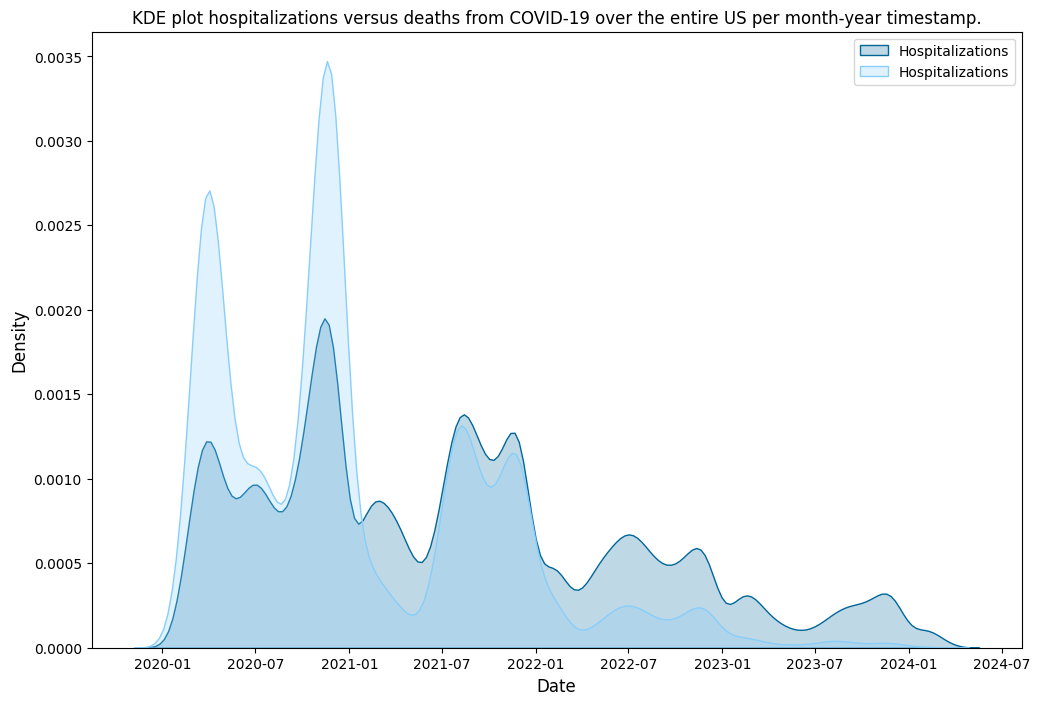

In [ ]:
hospitalizations = Q1[Q1['hosp_yn'] == "Yes"]
deaths = Q1[Q1['death_yn'] == "Yes"]
fig, ax = plt.subplots(figsize=(12, 8)) #['#006699', '#87CEFA']
sns.kdeplot(hospitalizations['case_month'], label="Hospitalizations", ax=ax, color='#006699', fill=True)
sns.kdeplot(deaths['case_month'], label="Hospitalizations", ax=ax, color='#87CEFA', fill=True)
ax.set_title('KDE plot hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend()
plt.show()

## Comments

The number of deaths and hospitalizations reached their peak in the first year of the pandemic. However, as time passes, the both numbers decrease as the number of infected people decreases.


# Question 2: The average rates of COVID-related deaths relative to patient demographics

In [ ]:
# Selecting the columns we are interested in for that question

Q2 = pd.read_csv(data1_path, usecols = ["sex", "age_group", "race", "death_yn"])

In [ ]:
Q2["death_yn"].unique(), Q2["sex"].unique(), Q2["age_group"].unique(), Q2["race"].unique()

(array(['No', 'Unknown', 'Missing', 'Yes', nan], dtype=object),
 array(['Female', 'Male', 'Unknown', nan, 'Missing', 'Other'], dtype=object),
 array(['18 to 49 years', '65+ years', '0 - 17 years', '50 to 64 years',
        nan, 'Missing'], dtype=object),
 array(['Unknown', 'White', 'Missing', nan, 'Black', 'Multiple/Other',
        'Asian', 'American Indian/Alaska Native',
        'Native Hawaiian/Other Pacific Islander'], dtype=object))

In [ ]:
df_age = Q2[['death_yn', 'age_group']]
df_race = Q2[['death_yn', 'race']]
df_sex = Q2[['death_yn', 'sex']]

In [ ]:
# Replace 'Missing' and 'Unknown' with NaN in 'death_yn' column
df_age['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
df_race['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
df_sex['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)


<ipython-input-16-2f1e97e815b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
<ipython-input-16-2f1e97e815b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
<ipython-input-16-2f1e97e815b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['death_yn'].replace(['Missing', 'Unknown']

In [ ]:
# Replace 'Missing' and 'Unknown' with NaN in 'age_group', 'race', and 'sex' columns

df_age['age_group'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
df_race['race'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
df_sex['sex'].replace(['Missing', 'Unknown'], np.nan, inplace=True)

<ipython-input-17-5396b3616f2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age_group'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
<ipython-input-17-5396b3616f2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['race'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
<ipython-input-17-5396b3616f2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['sex'].replace(['Missing', 'Unknown'], np.nan

In [ ]:
# Drop the rows where 'death_yn' has NaN values
df_age = df_age.dropna(subset=['death_yn', 'age_group'])
df_race = df_race.dropna(subset=['death_yn', 'race'])
df_sex = df_sex.dropna(subset=['death_yn', 'sex'])

## 1. Plot the percentages of deaths of each age group

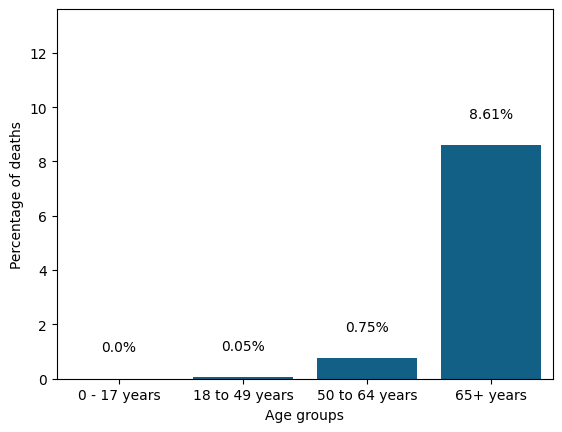

In [ ]:
# Calculate the percentage of deaths for each age group
age_death_percentages = df_age.groupby('age_group')['death_yn'].apply(lambda x: (x == 'Yes').mean() * 100)

# If 'death_yn' is NaN (no deaths), replace with 0
age_death_percentages = age_death_percentages.fillna(0)

# Create the histogram
sns.barplot(x=age_death_percentages.index, y=age_death_percentages.values, color='#006699')

# Set the y-axis limit
plt.ylim(0, age_death_percentages.max() + 5)

# Annotate each bar with the percentage of deaths
for i, v in enumerate(age_death_percentages.values):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center', color='black')

# Add labels to the x and y axes
plt.xlabel('Age groups')
plt.ylabel('Percentage of deaths')

# Show the plot
plt.show()


## Comments

People aged 65+ years are exposed to deaths than any other age group. This is mainly a consequence of the age factor where the elderly are more prone to diseases.

## 2. Plot the percentages of deaths of each gender






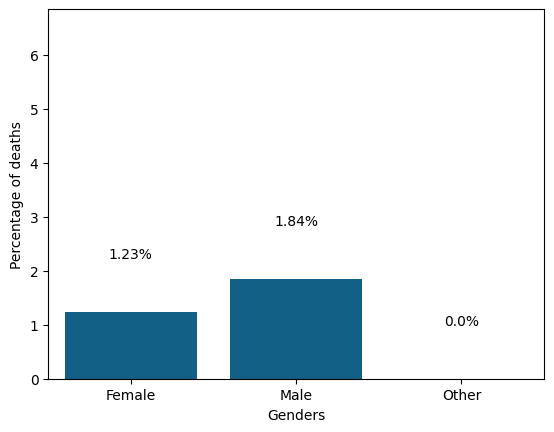

In [ ]:
# Calculate the percentage of deaths for each gender
sex_death_percentages = df_sex.groupby('sex')['death_yn'].apply(lambda x: (x == 'Yes').mean() * 100)

# If 'death_yn' is NaN (no deaths), replace with 0
sex_death_percentages = sex_death_percentages.fillna(0)

# Create the histogram
sns.barplot(x=sex_death_percentages.index, y=sex_death_percentages.values, color='#006699')

# Set the y-axis limit
plt.ylim(0, sex_death_percentages.max() + 5)

# Annotate each bar with the percentage of deaths
for i, v in enumerate(sex_death_percentages.values):
    plt.text(i, v + 1, str(round(v, 2)) + '%', ha='center', color='black')

# Add labels to the x and y axes
plt.xlabel('Genders')
plt.ylabel('Percentage of deaths')

# Show the plot
plt.show()


## Comments

Men and women have an equal likelihood of dying from COVID-19.

## 3. Plot the percentages of deaths of each race

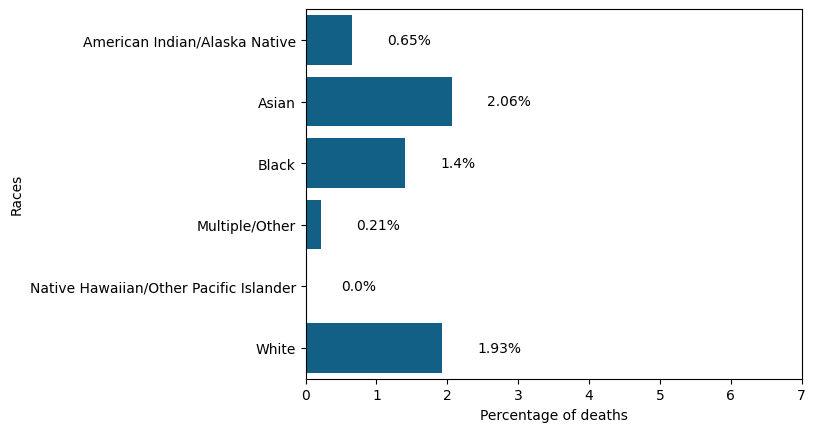

In [ ]:
# Calculate the percentage of deaths for each race
race_death_percentages = df_race.groupby('race')['death_yn'].apply(lambda x: (x == 'Yes').mean() * 100)

# If 'death_yn' is NaN (no deaths), replace with 0
race_death_percentages = race_death_percentages.fillna(0)

# Create the horizontal histogram
sns.barplot(y=race_death_percentages.index, x=race_death_percentages.values, color='#006699', orient='h')

# Set the x-axis limit
plt.xlim(0, round(race_death_percentages.max()) + 5)

# Annotate each bar with the percentage of deaths
for i, v in enumerate(race_death_percentages.values):
    plt.text(v + 0.5, i, str(round(v, 2)) + '%', va='center', color='black')

# Add labels to the x and y axes
plt.ylabel('Races')
plt.xlabel('Percentage of deaths')

# Show the plot
plt.show()

## Comments

This shows that most of the deaths from the collected data are Asians living in the US.

# Question 3: The rates of COVID-related hospitalization and death with age (across age groups).

In [ ]:
Q3 = pd.read_csv(data1_path, usecols = ["age_group", "hosp_yn", "death_yn"])

In [ ]:
Q3

,age_group,hosp_yn,death_yn
0,18 to 49 years,Missing,No
1,18 to 49 years,Missing,Unknown
2,18 to 49 years,No,Missing
3,18 to 49 years,Missing,Missing
4,65+ years,No,No
...,...,...,...
19020957,18 to 49 years,Yes,No
19020958,18 to 49 years,Missing,Missing
19020959,50 to 64 years,Missing,Missing
19020960,0 - 17 years,No,No


In [ ]:
# Replace 'Missing' and 'Unknown' with NaN in 'age_group', 'hosp_yn', and 'death_yn' columns

Q3['age_group'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q3['hosp_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q3['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)

In [ ]:
Q3 = Q3.dropna(subset=['death_yn', 'hosp_yn', 'age_group'])

In [ ]:
# Convert 'Yes'/'No' to 1/0
Q3['hosp_yn'] = Q3['hosp_yn'].map({'Yes': 1, 'No': 0})
Q3['death_yn'] = Q3['death_yn'].map({'Yes': 1, 'No': 0})

<ipython-input-26-613b5717ce54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['hosp_yn'] = Q3['hosp_yn'].map({'Yes': 1, 'No': 0})
<ipython-input-26-613b5717ce54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['death_yn'] = Q3['death_yn'].map({'Yes': 1, 'No': 0})


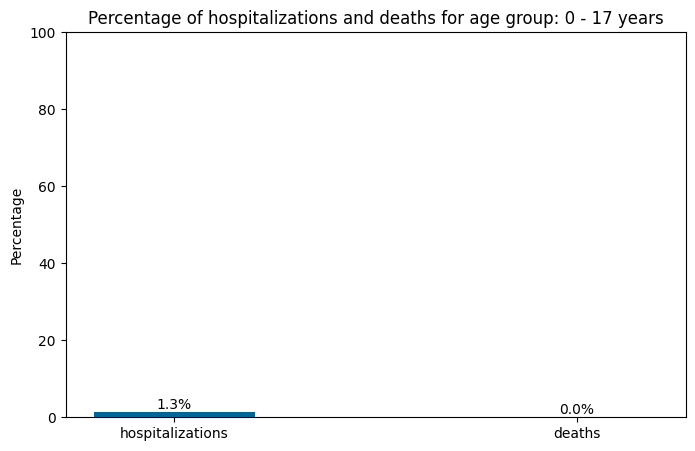

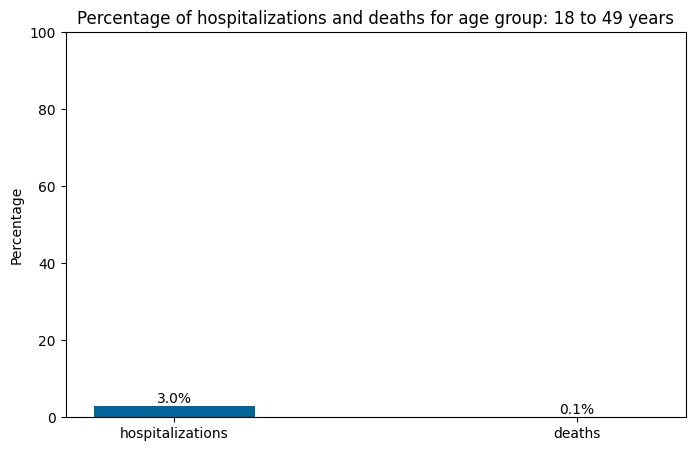

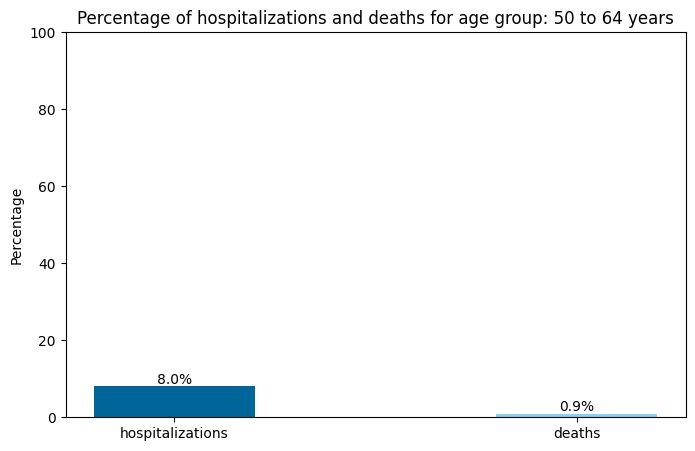

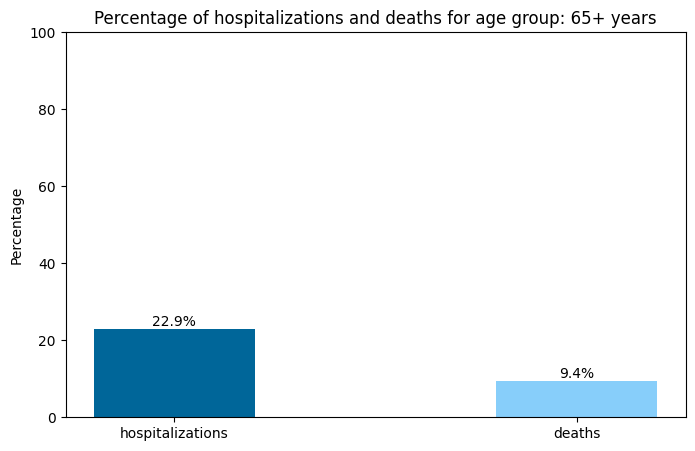

In [ ]:
# Calculate the percentage of hospitalization and death for each age group
age_group_percentages = Q3.groupby('age_group')[['hosp_yn', 'death_yn']].mean() * 100

# Iterate over each age group and create a separate plot
for age_group in age_group_percentages.index:
    plt.figure(figsize=(8, 5))

    # Plot the hospitalization and death rates for the current age group
    categories = ['hospitalizations', 'deaths']
    percentages = [age_group_percentages.loc[age_group, 'hosp_yn'], age_group_percentages.loc[age_group, 'death_yn']]

    bars = plt.bar(categories, percentages, color=['#006699', '#87CEFA'], width=0.4)

    # Add title and labels
    plt.title(f'Percentage of hospitalizations and deaths for age group: {age_group}')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)

    # Add percentage labels above each bar
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

    # Show the plot
    plt.show()

## Comments

We can see that the most affected age group are those aged 65+ years. In contrast, the least affected age group is the group aged from 0 to 17 years old, which makes sense as the elderly are more prone to getting infected.



# Question 4: Average rate of COVID-related hospitalization and death per state over the entire study period.

In [ ]:
Q4 = pd.read_csv(data1_path, usecols = ["res_state", "hosp_yn", "death_yn"])

In [ ]:
Q4['res_state'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q4['hosp_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q4['death_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)

In [ ]:
Q4 = Q4.dropna(subset=['death_yn', 'hosp_yn', 'res_state'])

In [ ]:
Q4

,res_state,hosp_yn,death_yn
4,MA,No,No
10,FL,No,No
12,FL,No,No
13,UT,No,No
16,MI,No,No
...,...,...,...
19020943,FL,No,No
19020944,OH,No,No
19020954,FL,No,No
19020957,TX,Yes,No


In [ ]:
len(Q4['res_state'].unique())

52

In [ ]:
# Convert 'Yes'/'No' to 1/0
Q4['hosp_yn'] = Q4['hosp_yn'].map({'Yes': 1, 'No': 0})
Q4['death_yn'] = Q4['death_yn'].map({'Yes': 1, 'No': 0})

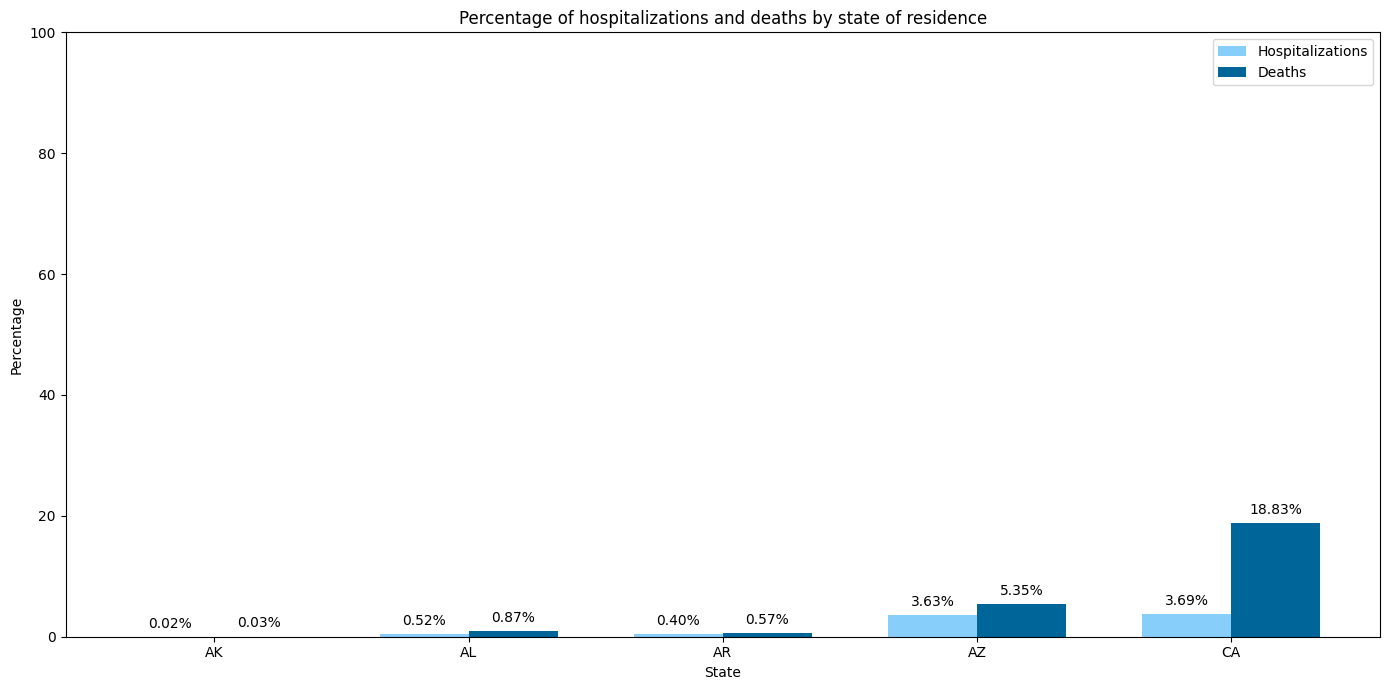

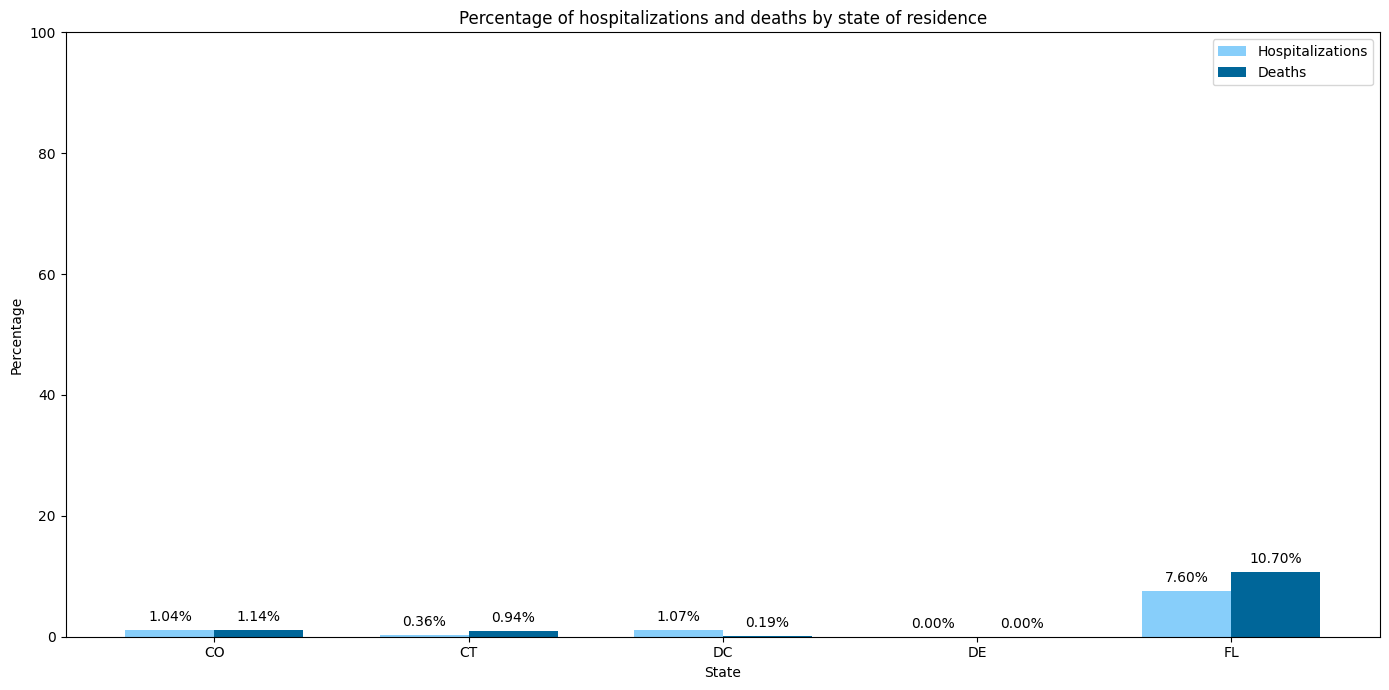

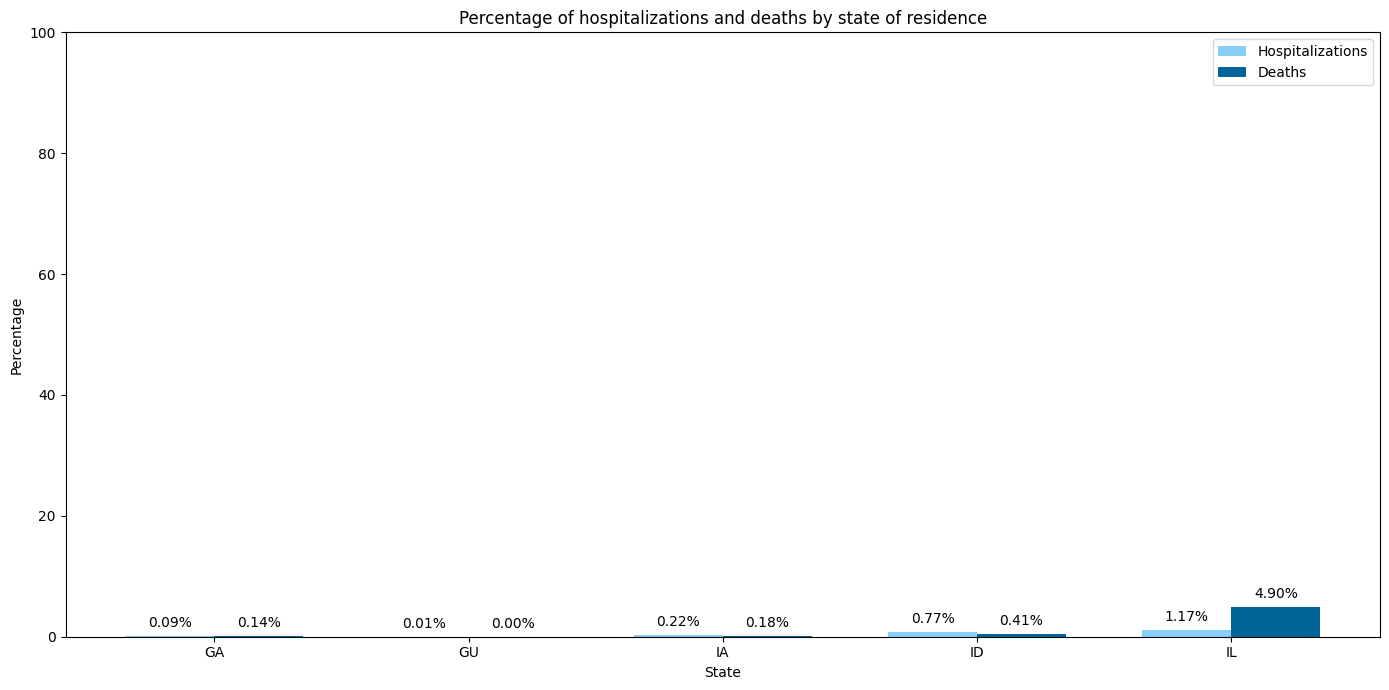

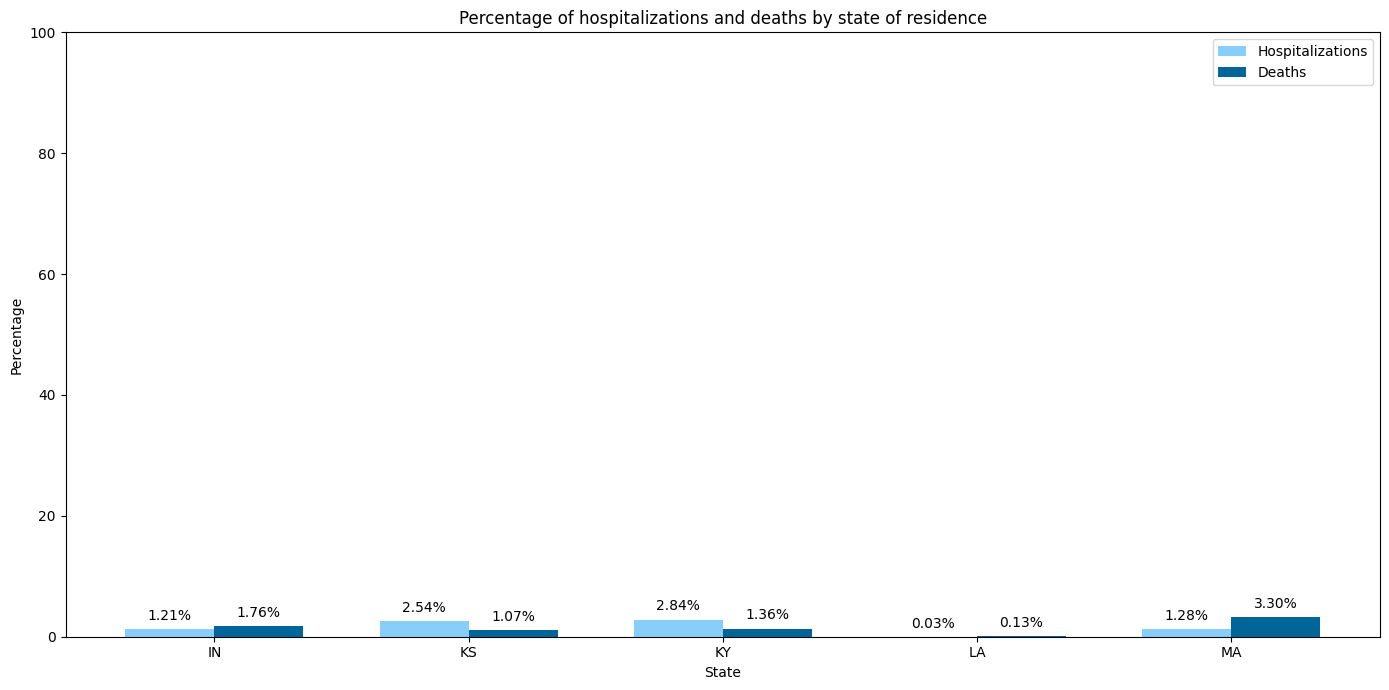

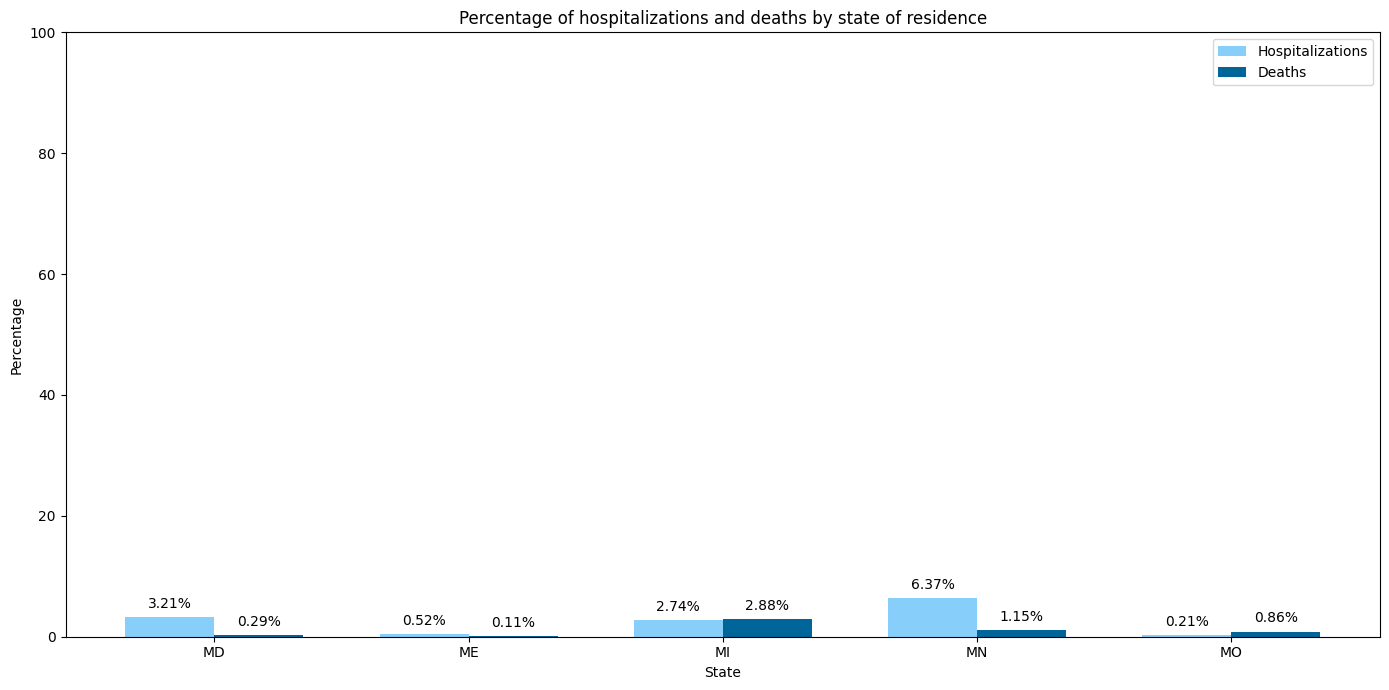

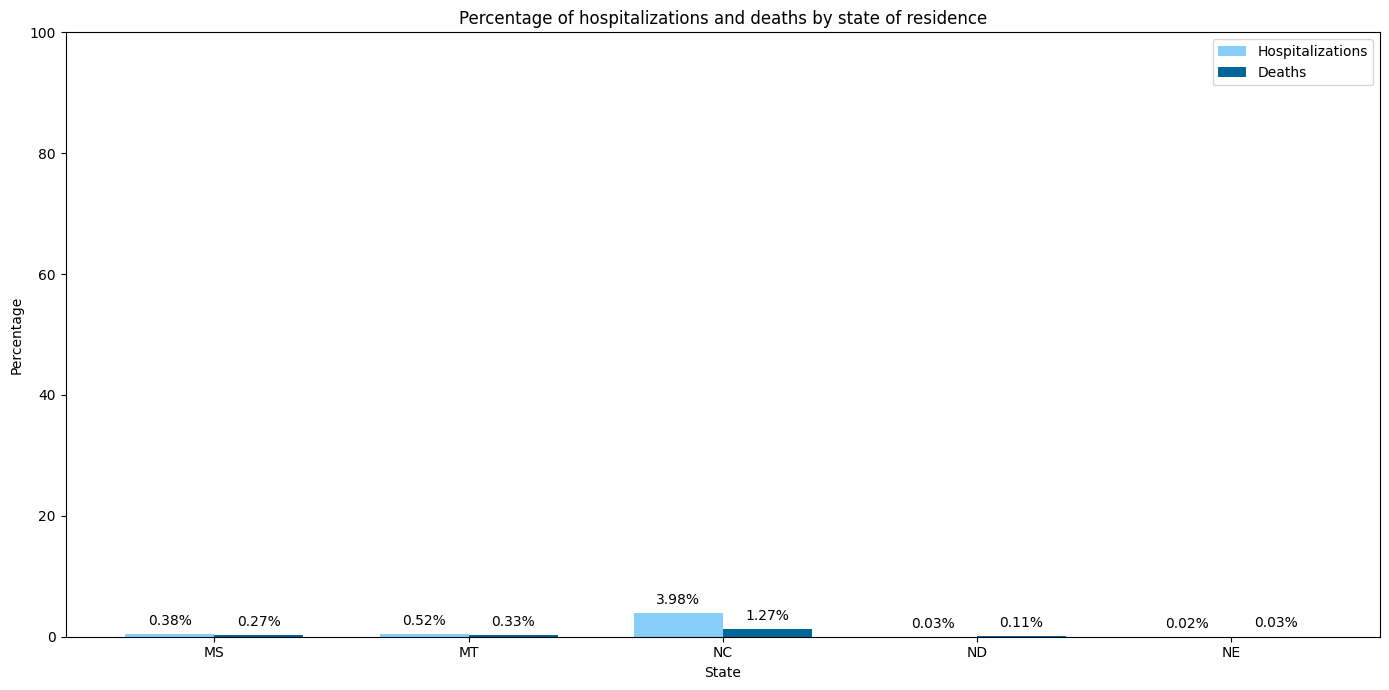

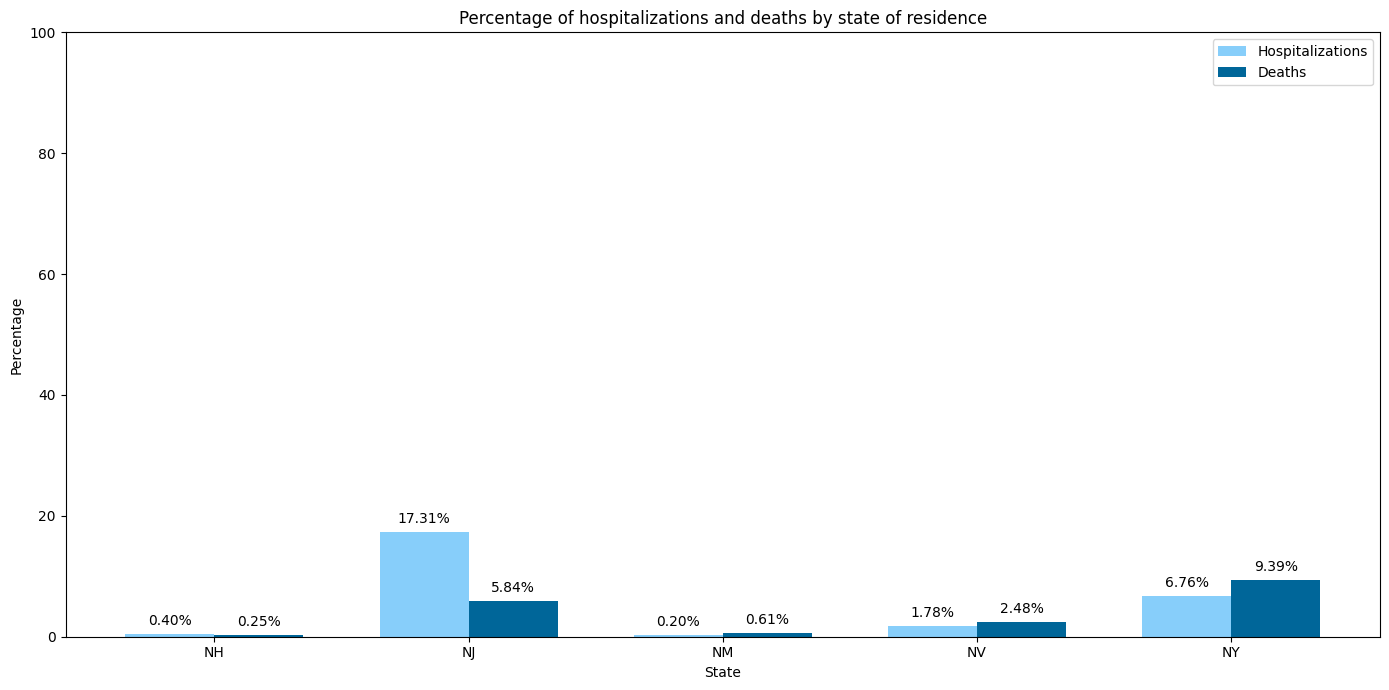

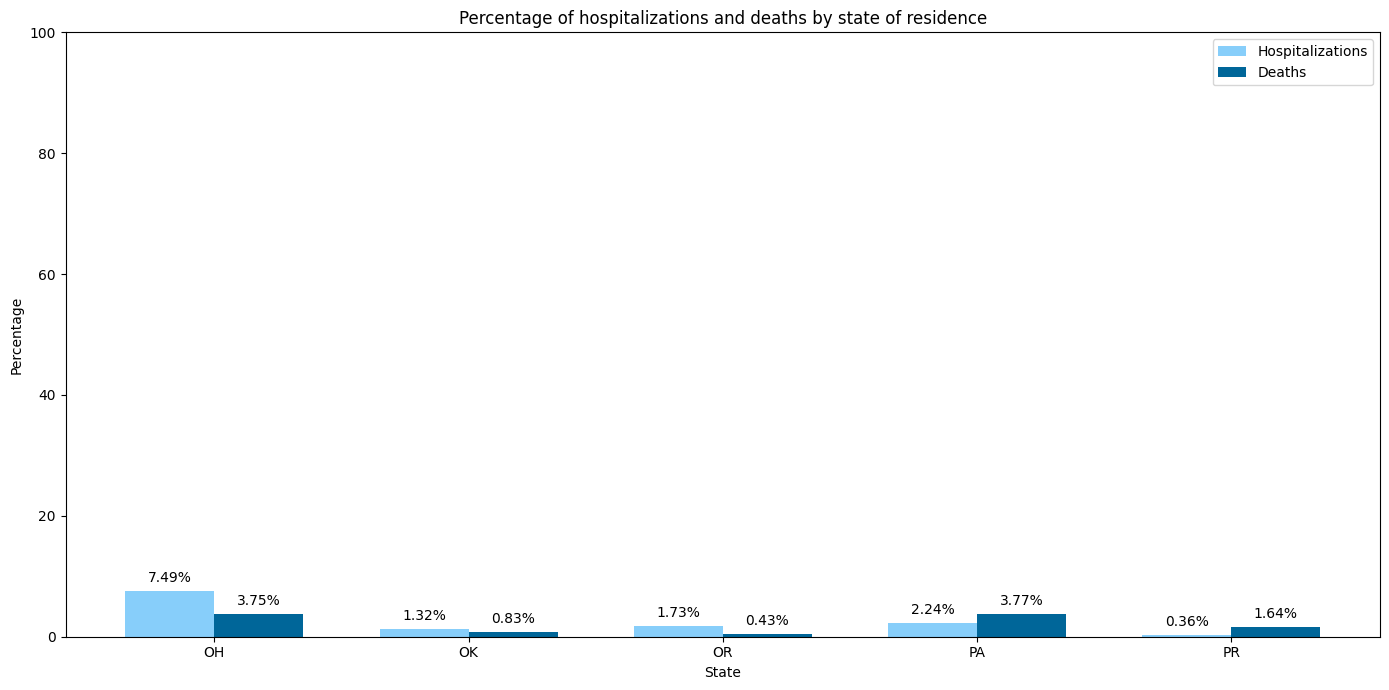

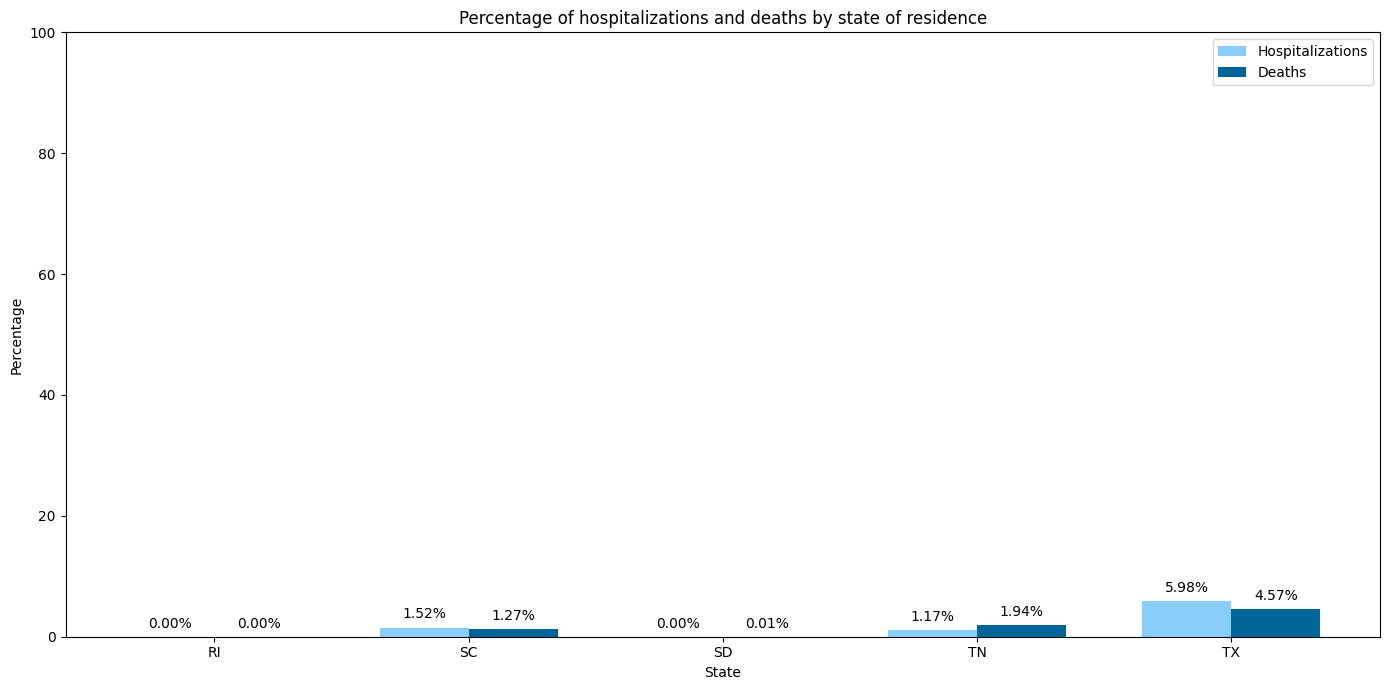

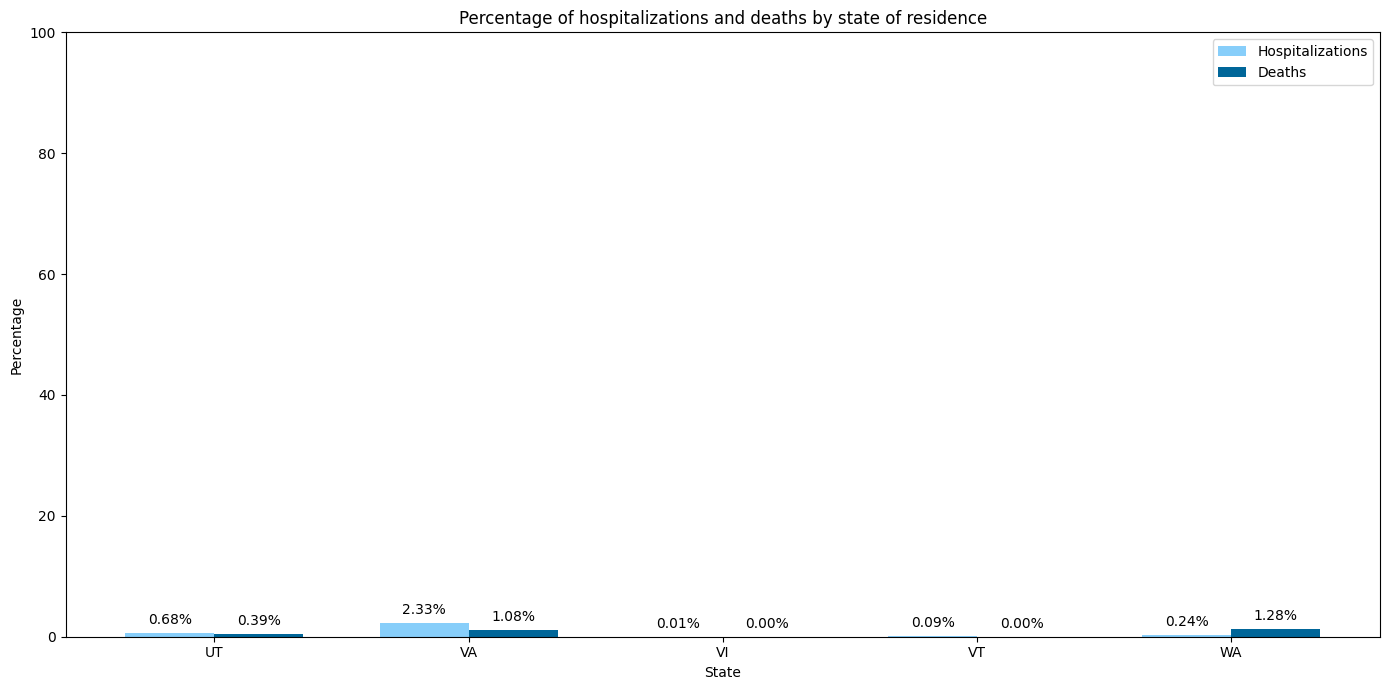

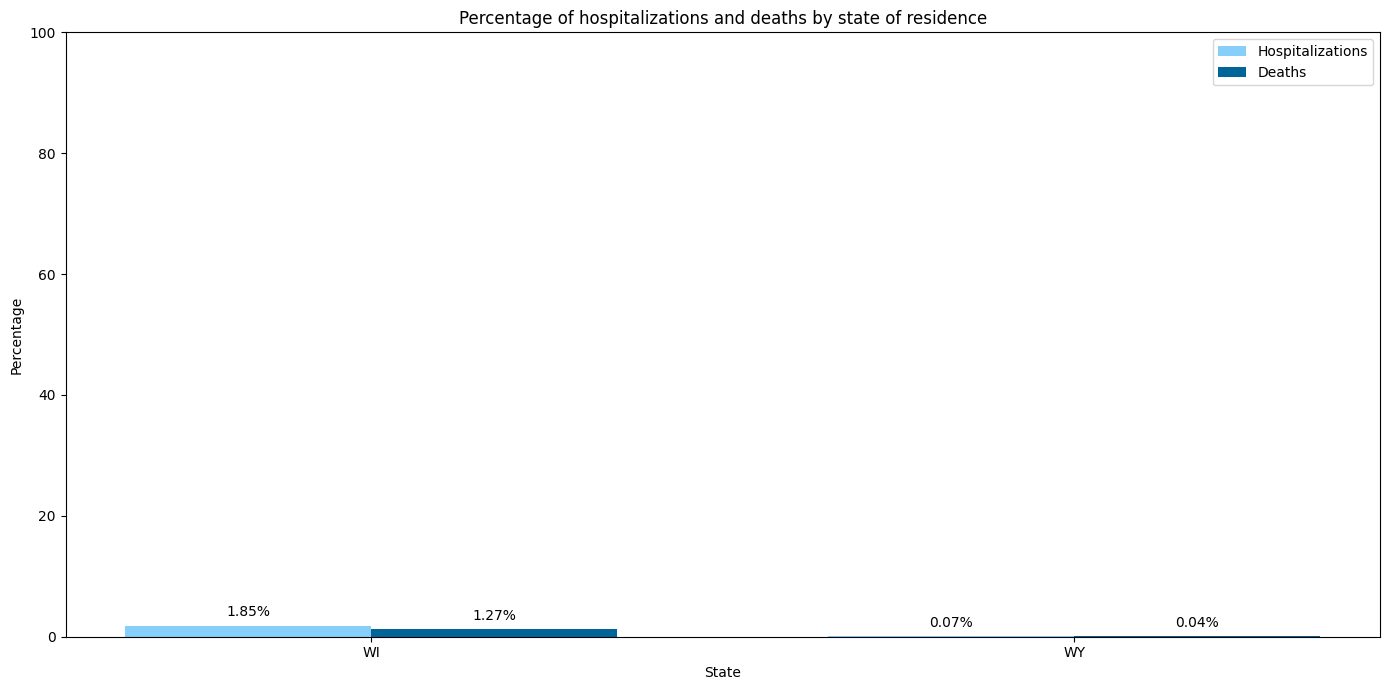

In [ ]:
# Calculate the total counts for hospitalizations and deaths per state
state_counts = Q4.groupby('res_state').agg({'hosp_yn': 'sum', 'death_yn': 'sum'}).reset_index()
state_counts.columns = ['res_state', 'total_hospitalizations', 'total_deaths']

# Calculate the percentage of hospitalizations and deaths for each state
state_counts['hospitalization_percentage'] = (state_counts['total_hospitalizations'] / Q4['hosp_yn'].sum()) * 100
state_counts['death_percentage'] = (state_counts['total_deaths'] / Q4['death_yn'].sum()) * 100

# Plotting 5 states in each plot
for i in range(0, len(state_counts), 5):
    plt.figure(figsize=(14, 7))

    subset = state_counts.iloc[i:i+5]

    # Setting the positions for the bars
    bar_width = 0.35
    index = np.arange(len(subset))

    # Plotting hospitalization bars
    plt.bar(index, subset['hospitalization_percentage'], bar_width, color='#87CEFA', label='Hospitalizations')
    for j, value in enumerate(subset['hospitalization_percentage']):
        plt.text(j, value + 1, f'{value:.2f}%', ha='center', va='bottom')

    # Plotting death
    plt.bar(index + bar_width, subset['death_percentage'], bar_width, color='#006699', label='Deaths')
    for j, value in enumerate(subset['death_percentage']):
        plt.text(j + bar_width, value + 1, f'{value:.2f}%', ha='center', va='bottom')

    plt.title('Percentage of hospitalizations and deaths by state of residence')
    plt.xlabel('State')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.xticks(index + bar_width / 2, subset['res_state'])
    plt.legend()
    plt.tight_layout()
    plt.show()

## Comments

Most affected states are California and New York. This is can be explained as they are from the most populated states in the US.

# Question 5: The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.




In [ ]:
Q5 = pd.read_csv(data1_path, usecols = ["icu_yn", "underlying_conditions_yn", "age_group"])

In [ ]:
# Replace 'Missing' and 'Unknown' with NaN in 'age_group', 'icu_yn', and 'underlying_conditions_yn' columns

Q5['icu_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q5['underlying_conditions_yn'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
Q5['age_group'].replace(['Missing', 'Unknown'], np.nan, inplace=True)

In [ ]:
# Drop the null values

Q5 = Q5.dropna(subset=['icu_yn', 'underlying_conditions_yn', 'age_group'])

## 1. ICU Admission percentage by age group (with underlying conditions)

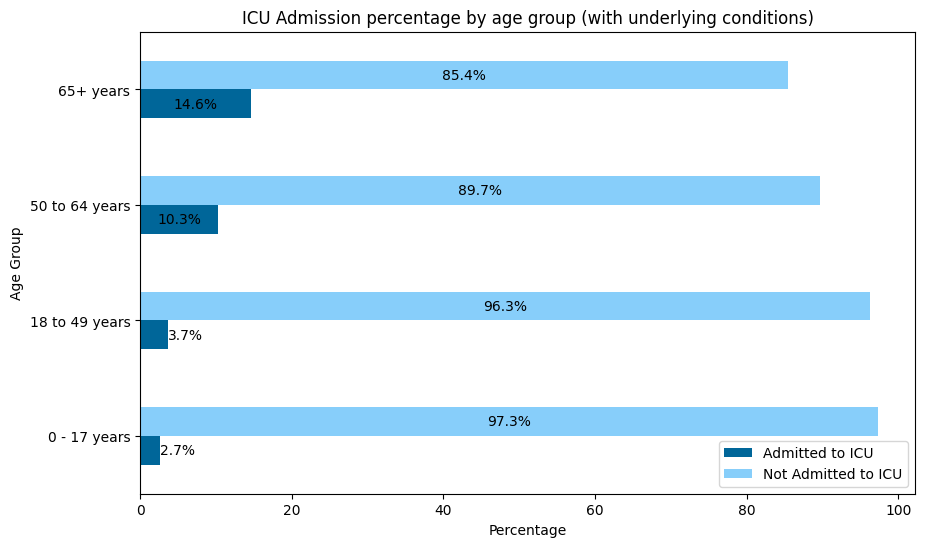

In [ ]:
# Filter rows where underlying conditions are present
Q5_yes = Q5[Q5['underlying_conditions_yn'] == 'Yes']

# Group by age_group and icu_yn, and calculate the percentages
grouped = Q5_yes.groupby(['age_group', 'icu_yn']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped['Percent_Admitted_ICU'] = (grouped['Yes'] / grouped['Total']) * 100
grouped['Percent_Not_Admitted_ICU'] = (grouped['No'] / grouped['Total']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for admitted and not admitted to ICU side by side with custom colors
bars = grouped[['Percent_Admitted_ICU', 'Percent_Not_Admitted_ICU']].plot(
    kind='barh', ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Age Group')
ax.set_title('ICU Admission percentage by age group (with underlying conditions)')

# Adding percentages above each bar
for bar in bars.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Changing the legend
ax.legend(['Admitted to ICU', 'Not Admitted to ICU'], loc='lower right')

# Display the plot
plt.show()

# 2. ICU Admission percentage by age group (without underlying conditions)

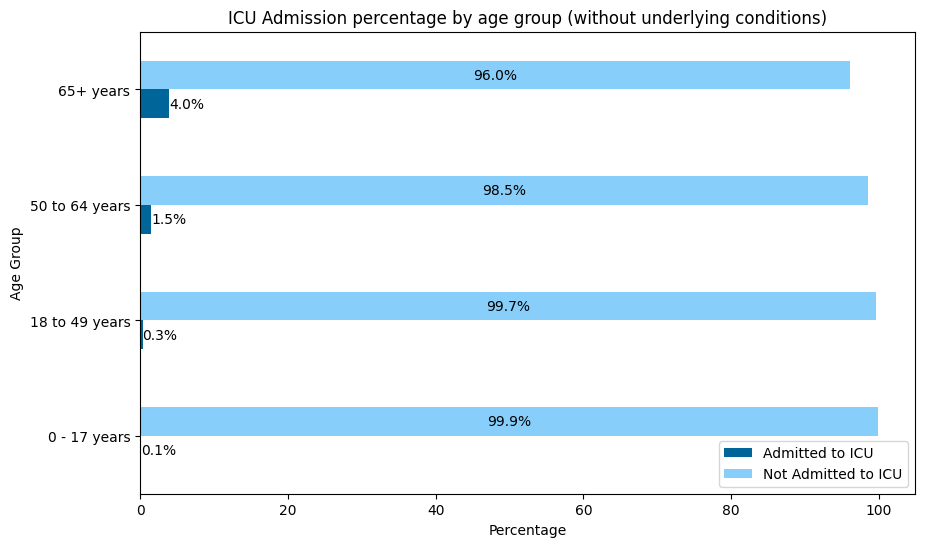

In [ ]:
# Filter rows where underlying conditions are not present
Q5_No = Q5[Q5['underlying_conditions_yn'] == 'No']

# Group by age_group and icu_yn, and calculate the percentages
grouped = Q5_No.groupby(['age_group', 'icu_yn']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
if 'Yes' in grouped.columns:
    grouped['Percent_Admitted_ICU'] = (grouped['Yes'] / grouped['Total']) * 100
else:
    grouped['Percent_Admitted_ICU'] = 0
grouped['Percent_Not_Admitted_ICU'] = (grouped['No'] / grouped['Total']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for admitted and not admitted to ICU side by side with custom colors
bars = grouped[['Percent_Admitted_ICU', 'Percent_Not_Admitted_ICU']].plot(
    kind='barh', ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Age Group')
ax.set_title('ICU Admission percentage by age group (without underlying conditions)')

# Adding percentages above each bar
for bar in bars.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Changing the legend
ax.legend(['Admitted to ICU', 'Not Admitted to ICU'], loc='lower right')

# Display the plot
plt.show()

## Comments

People with underlying conditions are more likely to be admitted to ICU. Also, The older, the more likely to be admitted to the ICU.

# Question 6: The rate of expected employment loss due to COVID-19 and sector of employment.

In [ ]:
Q6 = pd.read_csv(data2_path, usecols = ["kindwork", "expctloss"], dtype = {'kindwork': 'category',
                                                                           'expctloss': 'category'})

In [ ]:
# Mapping the form responses to their meaning

mapping_kindwork = {
'1': 'Government',
'2': 'Private company',
'3': 'Non-profit organization',
'4': 'Self-employed',
'5': 'Working in a family business',
}
mapping_WorkLoss = {
'1': 'Yes',
'2': 'No',
}
Q6['kindwork'] = Q6['kindwork'].cat.rename_categories(mapping_kindwork)
Q6['expctloss'] = Q6['expctloss'].cat.rename_categories(mapping_WorkLoss)

In [ ]:
# For kindwork and expctloss, -88 means 'Missing' while -99 means 'Question seen but category not selected'
Q6['kindwork'].replace(['-88', '-99'], np.nan, inplace=True)
Q6['expctloss'].replace(['-88', '-99'], np.nan, inplace=True)


In [ ]:
# Drop the null values
Q6 = Q6.dropna(subset=['kindwork', 'expctloss'])

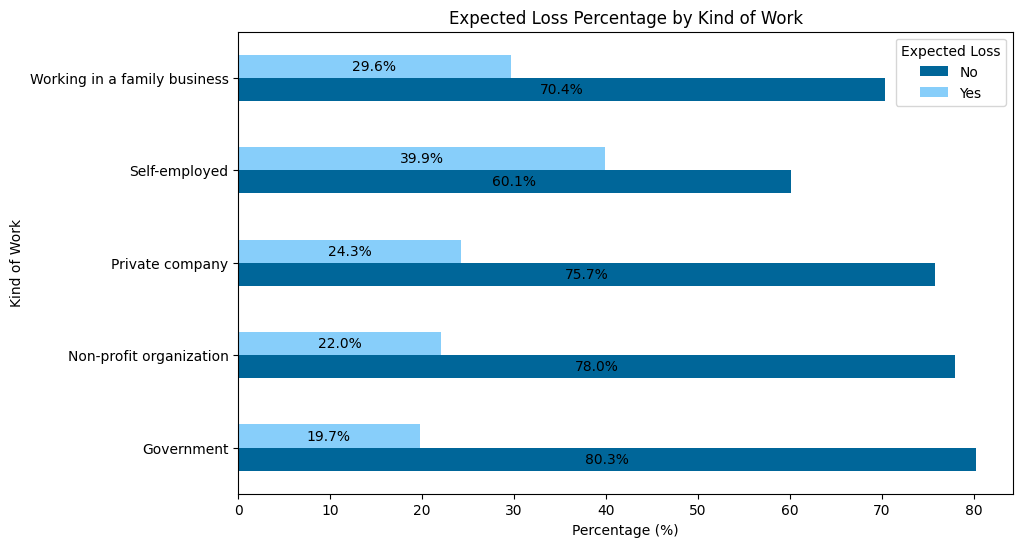

In [ ]:
grouped = Q6.groupby('kindwork')['expctloss'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for expected loss Yes and No side by side
grouped.plot(kind='barh', stacked=False, ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Kind of Work')
ax.set_title('Expected Loss Percentage by Kind of Work')

# Changing the legend
ax.legend(title='Expected Loss', loc='upper right')

# Adding percentages above each bar
for bar in ax.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Display the plot
plt.show()

## Comments

People who had their own business are the most affected by the
pandemic because of the lockup that caused a big global recession (A significant, widespread, and prolonged downturn in economic activity.).


# Question 7: The rate of expected employment loss due to COVID-19 relative to responders demographics.

In [ ]:
Q7 = pd.read_csv(data2_path, usecols = ['rrace', 'egender', 'expctloss'], dtype = {'rrace': 'category',
                                                                                  'egender': 'category',
                                                                                  'expctloss': 'category'})

In [ ]:
Q7['expctloss'].replace(['-88', '-99'], np.nan, inplace=True)
Q7 = Q7.dropna(subset=['expctloss'])

In [ ]:
# Mapping the form responses to their meaning

mapping_gender = {
'1': 'Male',
'2': 'Female'
}
mapping_race = {
'1': 'White, Alone',
'2': 'Black, Alone',
'3': 'Asian, Alone',
'4': 'Any other race alone, or race in combination'
}
mapping_WorkLoss = {
'1': 'Yes',
'2': 'No',
}

Q7['egender'] = Q7['egender'].cat.rename_categories(mapping_gender)
Q7['rrace'] = Q7['rrace'].cat.rename_categories(mapping_race)
Q7['expctloss'] = Q7['expctloss'].cat.rename_categories(mapping_WorkLoss)

## 1. Expected employment loss percentage by race

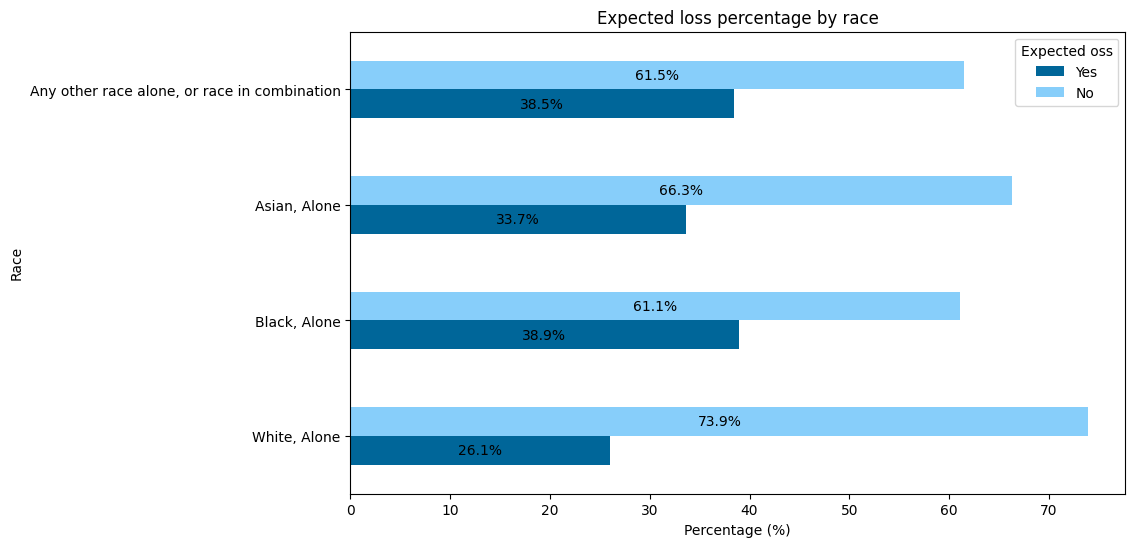

In [ ]:
grouped = Q7.groupby('rrace')['expctloss'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for expected loss Yes and No side by side
grouped.plot(kind='barh', stacked=False, ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Race')
ax.set_title('Expected loss percentage by race')

# Changing the legend
ax.legend(title='Expected oss', loc='upper right')

# Adding percentages above each bar
for bar in ax.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Display the plot
plt.show()

## 2. Expected employment loss percentage by gender

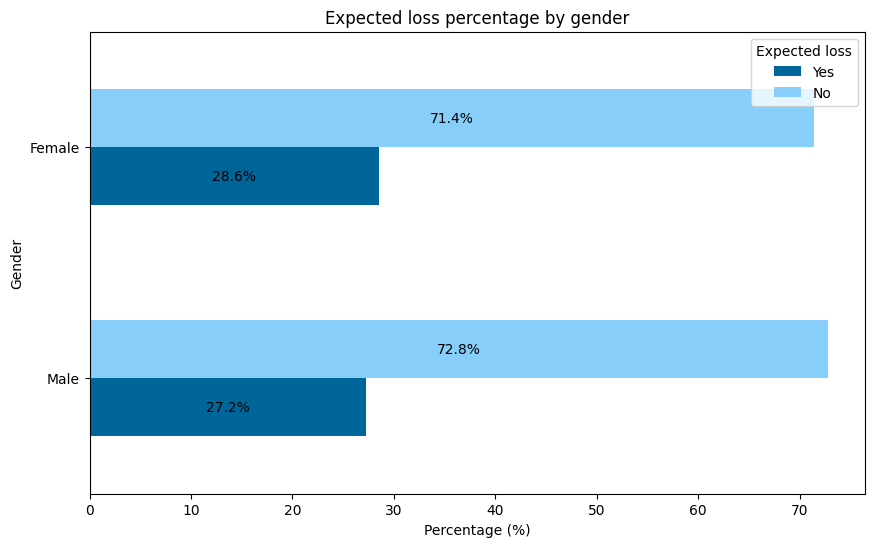

In [ ]:
grouped = Q7.groupby('egender')['expctloss'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for expected loss Yes and No side by side
grouped.plot(kind='barh', stacked=False, ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Gender')
ax.set_title('Expected loss percentage by gender')

# Changing the legend
ax.legend(title='Expected loss', loc='upper right')

# Adding percentages above each bar
for bar in ax.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Display the plot
plt.show()

## Comments

Men and women have an equal likelihood of losing their jobs. However, white individuals are less likely to lose their jobs compared to black individuals.

# 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

In [ ]:
df1 = pd.read_csv(data1_path, usecols=["res_state", "hosp_yn"],
                  dtype={"res_state": "category", "hosp_yn": "category"},)

df2 = pd.read_csv(data2_path, usecols=["est_st", "expctloss", "income", "tbirth_year", "delay", "notget"],
                 dtype={"est_st": "category", "expctloss": "category",
                        "income": "category", "tbirth_year": "category", "delay": "category",
                        "notget": "category"})


In [ ]:
# Only hospitalized data points
df1 = df1[df1['hosp_yn'] == 'Yes']

In [ ]:
# Drop the rows with nulls
df1 = df1.dropna(subset=['res_state'])

In [ ]:
# Get the states with the most hospitalized cases
top_states = df1['res_state'].value_counts().sort_values(ascending=False).head(10)
top_states

res_state
CA    73075
NY    57054
NJ    45461
IL    38518
TX    32327
AZ    31217
FL    30167
OH    27260
PA    21723
MN    17539
Name: count, dtype: int64

In [ ]:
state_mapping = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06', 'CO': '08',
    'CT': '09', 'DE': '10', 'DC': '11', 'FL': '12', 'GA': '13', 'HI': '15',
    'ID': '16', 'IL': '17','IN': '18', 'IA': '19', 'KS': '20', 'KY': '21',
    'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25','MI': '26', 'MN': '27', 'MS': '28',
    'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33',
    'NJ': '34', 'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39', 'OK': '40',
    'OR': '41','PA': '42', 'RI': '44', 'SC': '45', 'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49',
    'VT': '50', 'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56', 'PR': '72', 'GU': '66', 'VI': '78', 'MP': '69', 'AS': '60'
}

# Inverse of the state_map dictionary
inverse_state_mappping = {v: k for k, v in state_mapping.items()}

In [ ]:
top_10 = [state_mapping[state] for state in top_states.index.to_list()]

In [ ]:
df2['expctloss'].replace(['-88', '-99'], np.nan, inplace=True)
df2 = df2.dropna(subset=['expctloss'])

In [ ]:
df2 = df2[df2['est_st'].isin(top_10)]
df2['est_st'] = df2['est_st'].cat.rename_categories(inverse_state_mappping)
df2['est_st'] = df2['est_st'].cat.remove_unused_categories()
print(df2["est_st"].cat.categories)

Index(['AZ', 'CA', 'FL', 'IL', 'MN', 'NJ', 'NY', 'OH', 'PA', 'TX'], dtype='object')


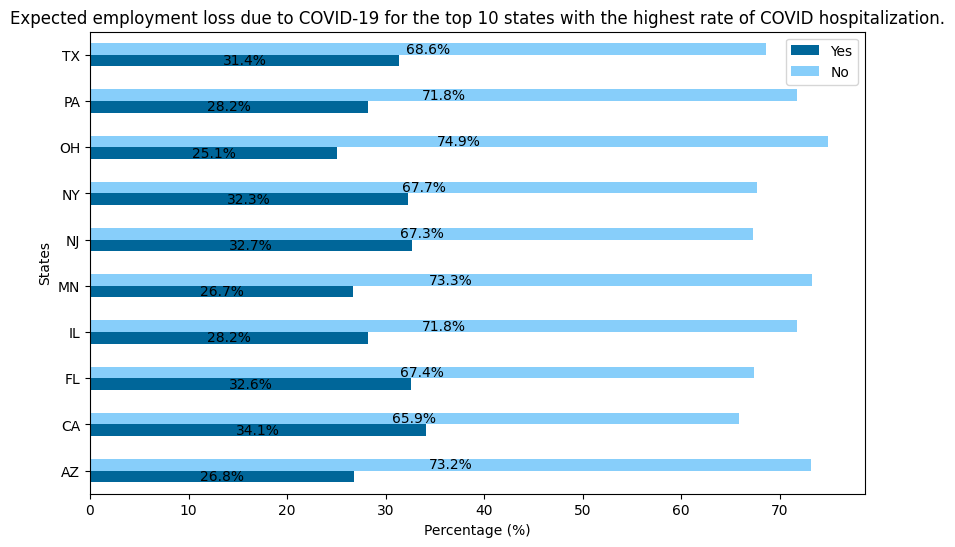

In [ ]:
grouped = df2.groupby('est_st')['expctloss'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for expected loss Yes and No side by side
grouped.plot(kind='barh', stacked=False, ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('States')
ax.set_title('Expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.')

# Changing the legend
legend_labels = ['Yes', 'No']
ax.legend(labels=legend_labels, loc='upper right')
# Adding percentages above each bar

for bar in ax.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='center', fontsize=10, color='black')
    else:
        ax.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Display the plot
plt.show()

## Comments

Among the top 10 states with the highest rate of COVID-19 hospitalization, California has the highest rate of expected employment loss with 34.1%.

# Question 9: The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [ ]:
df2 = pd.read_csv(data2_path, usecols=["income", "delay", "notget"], dtype={
"delay": "category",
"notget": "category",
"income": "category"})

In [ ]:
df2['delay'].replace(['-88', '-99'], np.nan, inplace=True)
df2['notget'].replace(['-88', '-99'], np.nan, inplace=True)
df2['income'].replace(['-88', '-99'], np.nan, inplace=True)

In [ ]:
df2 = df2.dropna(subset=['delay', 'notget', 'income'])

In [ ]:
Yes_No = {"1": "Yes", "2": "No"}
income_mapping = {
"1": "Less than $25,000",
"2": "$25,000 - $34,999",
"3": "$35,000 - $49,999",
"4": "$50,000 - $74,999",
"5": "$75,000 - $99,999",
"6": "$100,000 - $149,999",
"7": "$150,000 - $199,999",
"8": "$200,000 and above",
}


In [ ]:
df2['notget'] = df2['notget'].cat.rename_categories(Yes_No)
df2["income"] = df2["income"].cat.rename_categories(income_mapping)

In [ ]:
df2['delay_or_notget'] = ((df2['delay'] == "Yes") | (df2['notget'] == "No")).map({True: 'Yes', False: 'No'})

<ipython-input-65-89e22778aaf3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(wrapped_labels)


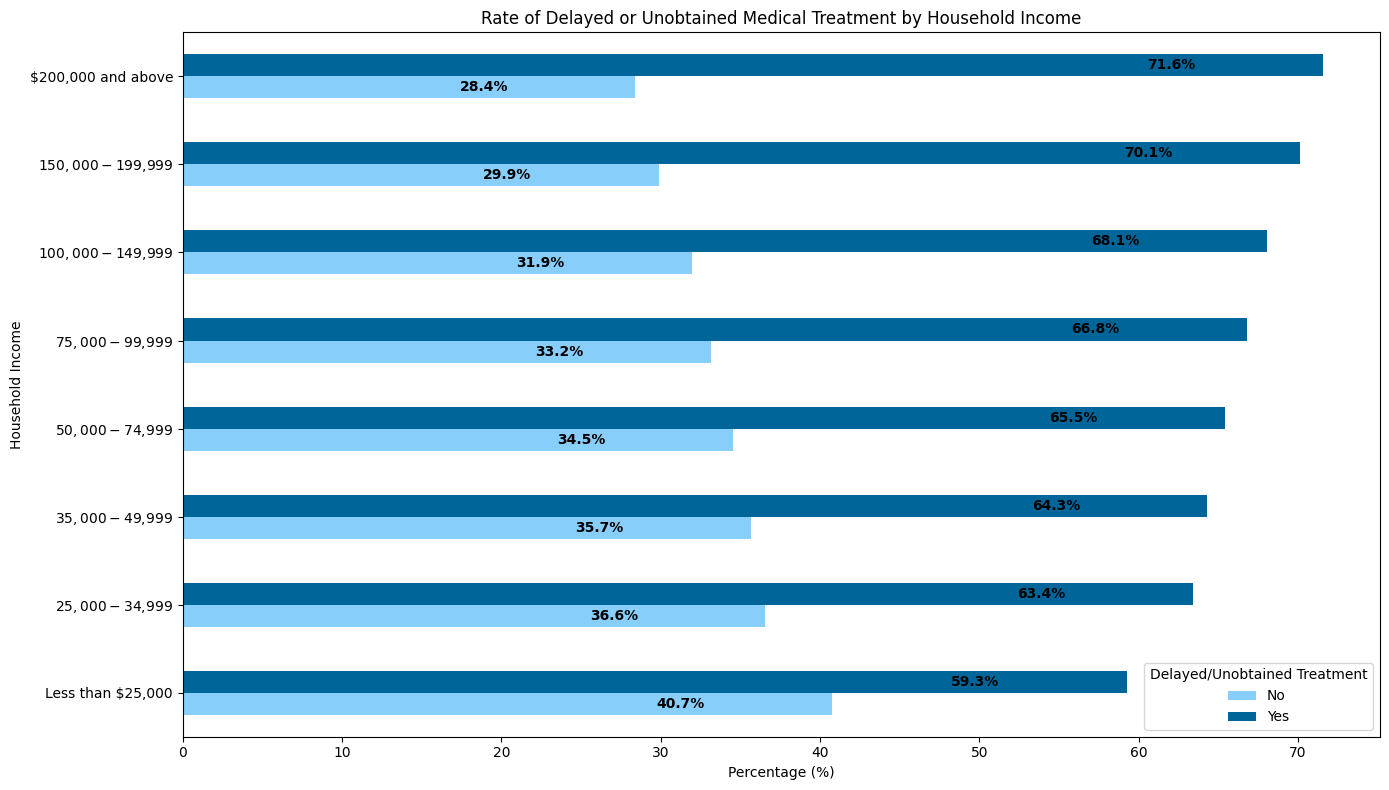

In [ ]:
# Assuming df2 is your DataFrame and it contains 'income' and 'delay_or_notget' columns
grouped = df2.groupby('income')['delay_or_notget'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for delay or not obtained treatment for each income group side by side
grouped.plot(kind='barh', stacked=False, ax=ax, color=['#87CEFA', '#006699'])

# Setting labels and title
ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Household Income')
ax.set_title('Rate of Delayed or Unobtained Medical Treatment by Household Income')

# Changing the legend
ax.legend(title='Delayed/Unobtained Treatment', labels=['No', 'Yes'], loc='lower right')

# Adding percentages above each bar
for bar in ax.patches:
    width = bar.get_width()
    if width > 10:
        ax.text(width - 8, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='right', fontsize=10, color='black', fontweight='bold')
    else:
        ax.text(width + 1, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%', va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Wrap x labels
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
plt.gca().set_xticklabels(wrapped_labels)

plt.tight_layout()
plt.show()

## Comments

Individuals with less inconme tend to delay the treatment or decide not to take it. This may be a result of the belief of anti-vaxxers about vaccines in general.

# Question 10: The relationship between COVID-19 symptom manifestation and age group.

In [ ]:
df2 = pd.read_csv(data1_path, usecols=["age_group", "symptom_status"],
                 dtype={"age_group": "category", "symptom_status": "category"})

In [ ]:
df2['age_group'].replace(['Missing', 'Unknown'], np.nan, inplace=True)
df2['symptom_status'].replace(['Missing', 'Unknown'], np.nan, inplace=True)

In [ ]:
df2 = df2.dropna(subset=['age_group', 'symptom_status'])

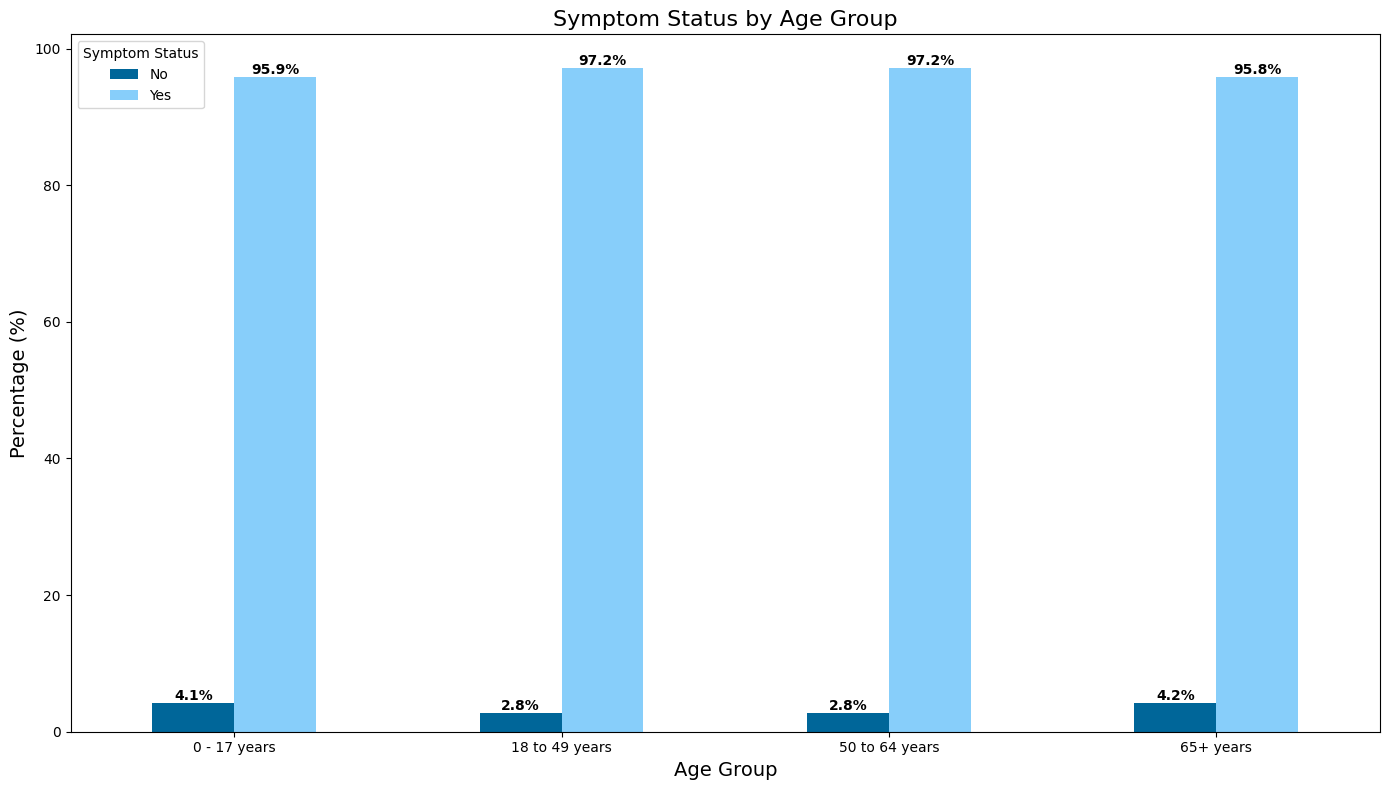

In [ ]:
# Group by age_group and symptom_status, and calculate the percentage
grouped = df2.groupby('age_group')['symptom_status'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for symptom status Yes and No side by side
grouped.plot(kind='bar', stacked=False, ax=ax, color=['#006699', '#87CEFA'])

# Setting labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Symptom Status by Age Group', fontsize=16)

# Changing the legend
ax.legend(title='Symptom Status', labels=['No', 'Yes'], loc='upper left')

# Adding percentages above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Set x-tick labels to horizontal
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

## Comments

Old individuals are more likely to experience symptom manifestation, which can lead to their hospitalization and maybe their death.




# 2. Answering Questions

## 2.1

### 1.
**Are hospitalized patients with underlying medical conditions and/or risk
 behaviors more likely to die from COVID-19?**

In [ ]:
# Filter for hospitalized patients
hospitalized = df1[df1['hosp_yn'] == 'Yes']

# Create binary variables
hospitalized['underlying_conditions'] = hospitalized['underlying_conditions_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
hospitalized['death'] = hospitalized['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop rows with missing values in the relevant columns
hospitalized = hospitalized.dropna(subset=['underlying_conditions', 'death'])

<ipython-input-9-882c7d98070f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalized['underlying_conditions'] = hospitalized['underlying_conditions_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-9-882c7d98070f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalized['death'] = hospitalized['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)


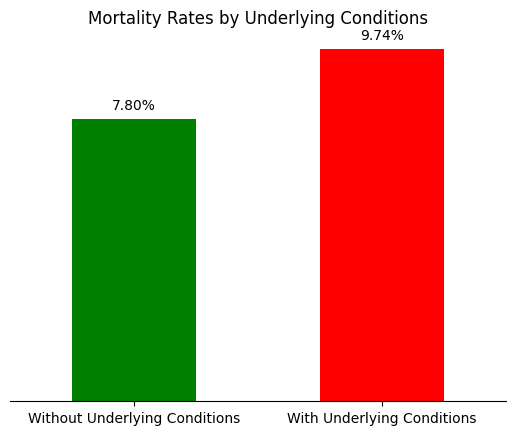

In [ ]:
# Visualization
mortality_rates = hospitalized.groupby('underlying_conditions')['death'].mean()
ax = mortality_rates.plot(kind='bar', title='Mortality Rates by Underlying Conditions', color=['green', 'red'])
#plt.xlabel('Underlying Conditions')
#plt.ylabel('Mortality Rate')

# Add data labels
for i, rate in enumerate(mortality_rates):
    ax.text(i, rate + 0.002, f'{rate:.2%}', ha='center', va='bottom')

plt.xticks([0, 1], ['Without Underlying Conditions', 'With Underlying Conditions'])

# Hide specific spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Keep bottom and left spines visible as you specified
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Do not set x-axis label
plt.xlabel('')  # This line is commented out to not display the x-axis title

# Rotate x-axis labels
plt.xticks(rotation=0)

ax.set_yticks([])  # Remove y-axis numbers

# Show the plot
plt.show()

The mortality rate for individuals **without** underlying conditions is **7.80%**, while the mortality rate for individuals **with** underlying conditions is **9.74%**.

Hospitalized patients with underlying medical conditions and/or risk
 behaviors are more likely to die from COVID-19.

### 2.
**Who are the people (the demographic segment) that appear to be most at
 risk of death due to COVID-19? Who is the least at risk?**

In [ ]:
# Calculate death rates by demographic segments
demographics = ['age_group', 'sex', 'race']
death_rates = df1.groupby(demographics)['death_yn'].apply(lambda x: (x == 'Yes').mean()).reset_index()

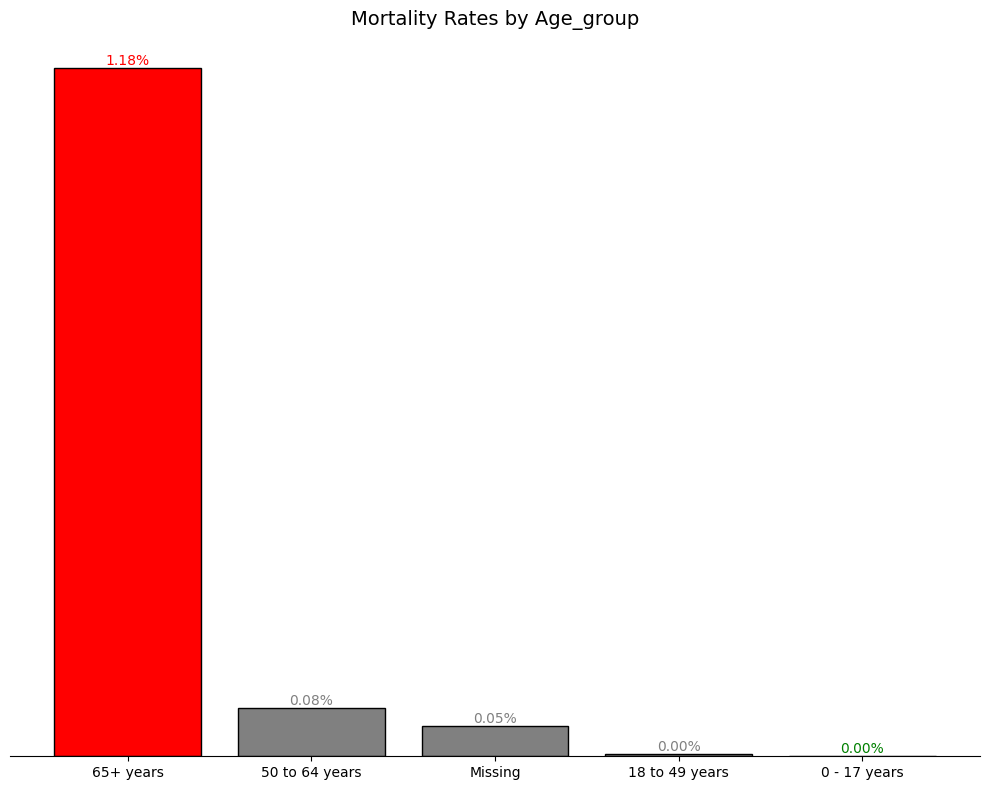

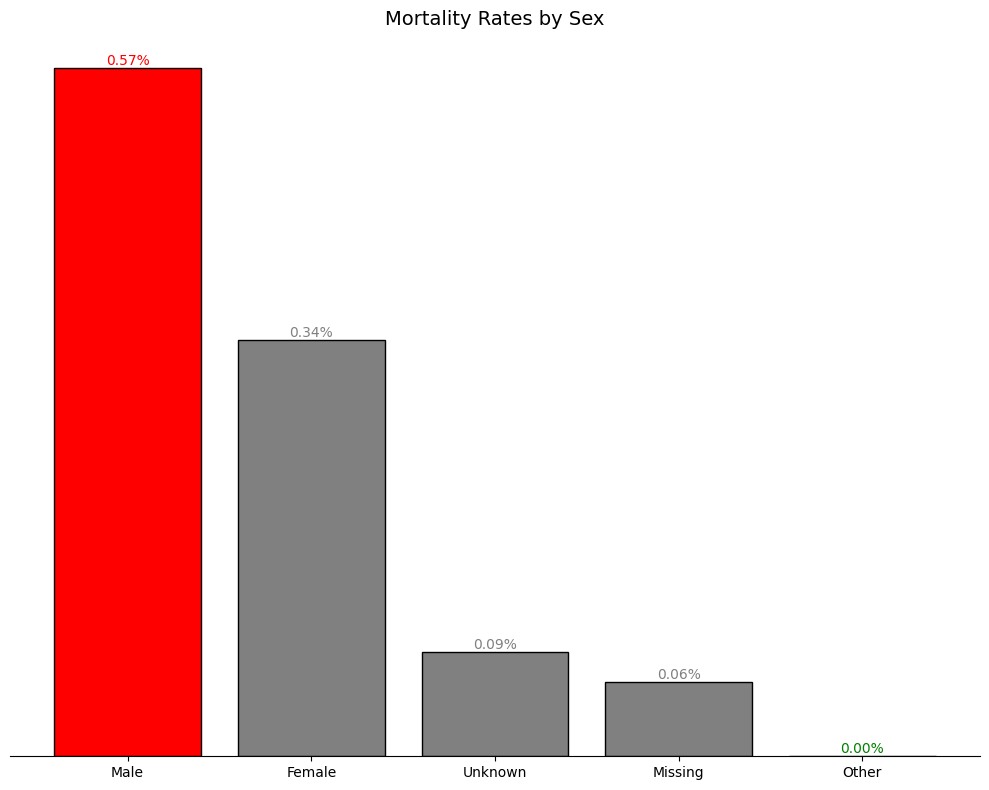

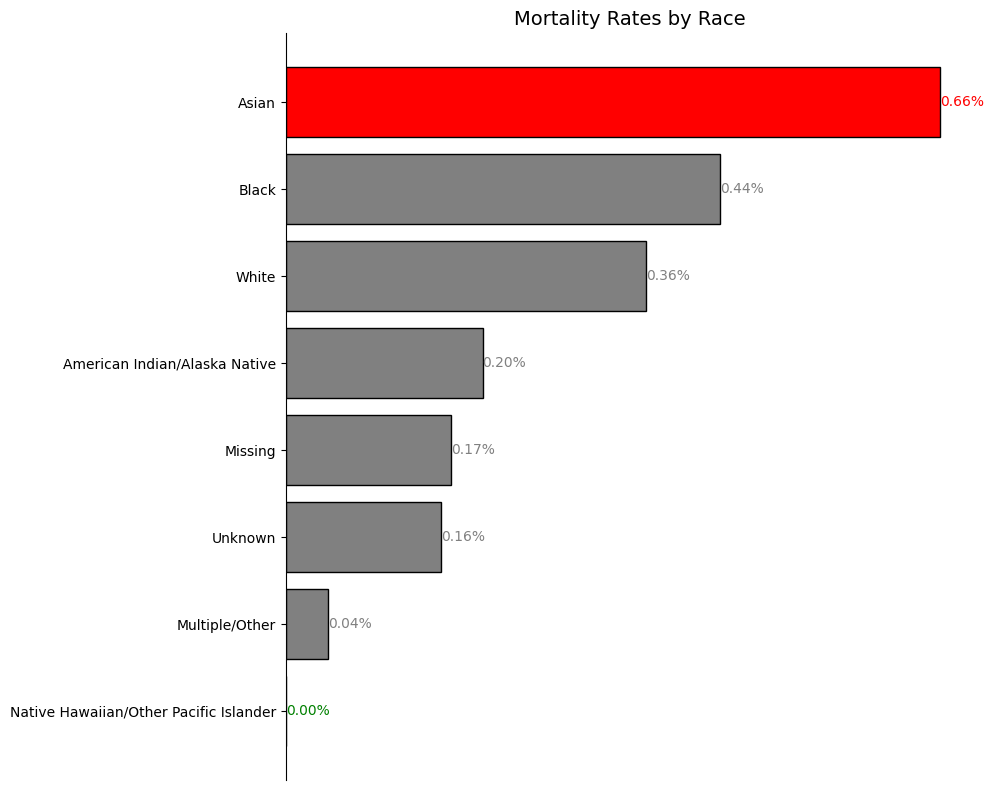

In [ ]:
# Loop through each demographic column
for demo in demographics:
    # Calculate mortality rates (mean death rate)
    mortality_rates = death_rates.groupby(demo)['death_yn'].mean().reset_index()

    # Sort by death rate and get the top 20 entries
    if demo == 'race':
        top_20 = mortality_rates.sort_values(by='death_yn', ascending=True).head(20)
    else:
        top_20 = mortality_rates.sort_values(by='death_yn', ascending=False).head(20)

    # Identify the indices of the maximum and minimum values within the sorted dataframe
    max_index = top_20['death_yn'].idxmax()
    min_index = top_20['death_yn'].idxmin()

    # Create a color list with gray for other values, red for max, and green for min
    colors = ['gray'] * len(top_20)
    colors[top_20.index.get_loc(max_index)] = 'red'
    colors[top_20.index.get_loc(min_index)] = 'green'

    # Create vertical bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    if demo == 'race':
        bars = ax.barh(top_20[demo], top_20['death_yn'], color=colors, edgecolor='black')
        # Add data labels for horizontal bars
        for index, value in enumerate(top_20['death_yn']):
            ax.text(value, index, f'{value:.2%}', va='center', fontsize=10, color=colors[index])
        # Remove x-axis ticks and labels for horizontal bars
        ax.set_xticks([])
    else:
        bars = ax.bar(top_20[demo], top_20['death_yn'], color=colors, edgecolor='black')
        # Add data labels for vertical bars
        for index, value in enumerate(top_20['death_yn']):
            ax.text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=10, color=colors[index])
        # Remove y-axis ticks and labels for vertical bars
        ax.set_yticks([])

    # Customize the plot
    ax.set_title(f'Mortality Rates by {demo.capitalize()}', fontsize=14)

    # Rotate x-axis labels for better readability if vertical bars
    if demo != 'race':
        plt.xticks(rotation=0, ha='center')

    # Hide specific spines (borders)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    if demo != 'race':
        ax.spines['left'].set_visible(False)
    if demo == 'race':
        ax.spines['bottom'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()


**Most at Risk:**

1. Older Adults (65+ years)
2. Males
3. Asian Racial Group

**Least at Risk:**

1. Children and Teenagers (0 - 17 years)
2. Individuals Identified as "Other" in Sex
3. Native Hawaiian/Other Pacific Islander Racial Group

### 3.
**What percent of patients who have reported exposure to any kind of travel /
 or congregation within the 14 days prior to illness onset end up hospitalized?
 What percent of those go on to be hospitalized?**

In [ ]:
# Calculate percentages of exposure and hospitalization
exposed = df1[df1['exposure_yn'] == 'Yes']
hospitalized_exposed = exposed[exposed['hosp_yn'] == 'Yes']
exposure_hosp_rate = (len(hospitalized_exposed) / len(exposed)) * 100

print(f'Percentage of exposed patients hospitalized: {exposure_hosp_rate:.2f}%')

Percentage of exposed patients hospitalized: 3.90%


In [ ]:
non_hospitalized_exposed_rate = 100 - exposure_hosp_rate

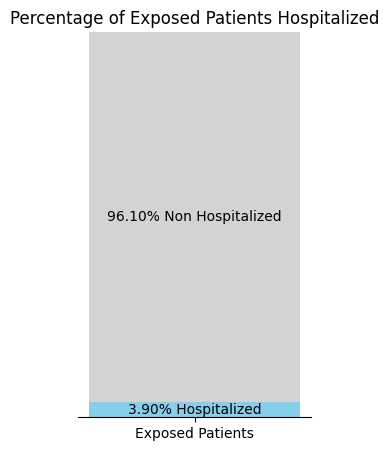

In [ ]:
# Data for the stacked bar chart
categories = ['Exposed Patients']
hospitalized = [exposure_hosp_rate]
non_hospitalized = [non_hospitalized_exposed_rate]

bar_width = 0.05  # Adjust the bar width

plt.figure(figsize=(3, 5))
plt.bar(categories, hospitalized, color='skyblue', width=bar_width)
plt.bar(categories, non_hospitalized, bottom=hospitalized, color='lightgray', width=bar_width)
plt.ylim(0, 100)
plt.title('Percentage of Exposed Patients Hospitalized')

# Add percentages on the bars
plt.text(0, hospitalized[0] / 2, f'{hospitalized[0]:.2f}% Hospitalized', ha='center', va='center', color='black')
plt.text(0, hospitalized[0] + non_hospitalized[0] / 2, f'{non_hospitalized[0]:.2f}% Non Hospitalized', ha='center', va='center', color='black')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove y-axis numbers
plt.yticks([])

# Remove the legend
plt.legend().remove()

plt.show()

### 4.
**Are Asymptomatic COVID patients less likely to be hospitalized? Are they
 less likely to die from their illness?**

In [ ]:
# Filter for symptomatic and asymptomatic patients
asymptomatic = df1[df1['symptom_status'] == 'Asymptomatic']
symptomatic = df1[df1['symptom_status'] == 'Symptomatic']

# Calculate hospitalization and death rates
asymptomatic_hosp_rate = (asymptomatic['hosp_yn'] == 'Yes').mean() * 100
symptomatic_hosp_rate = (symptomatic['hosp_yn'] == 'Yes').mean() * 100

asymptomatic_death_rate = (asymptomatic['death_yn'] == 'Yes').mean() * 100
symptomatic_death_rate = (symptomatic['death_yn'] == 'Yes').mean() * 100

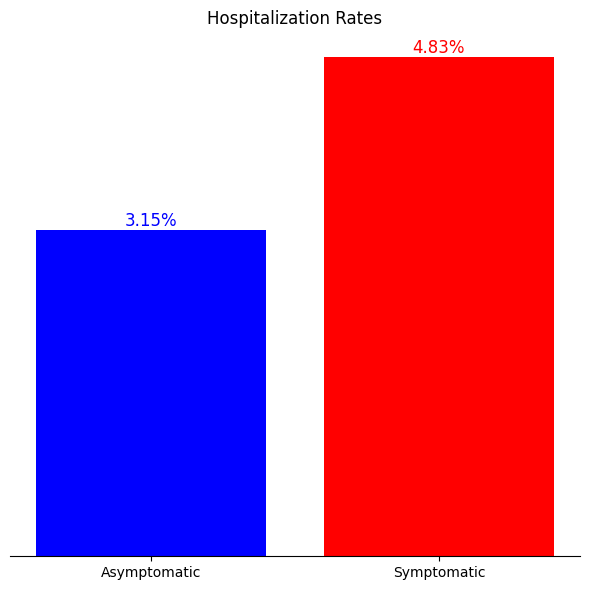

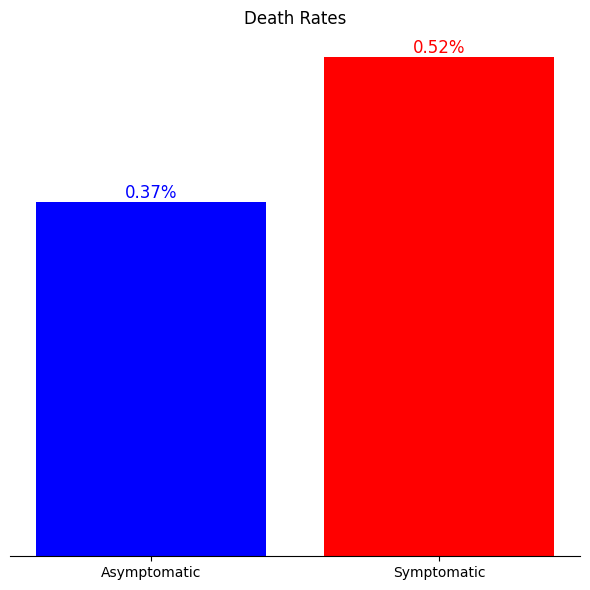

In [ ]:
# Visualization
labels = ['Asymptomatic', 'Symptomatic']
hosp_rates = [asymptomatic_hosp_rate, symptomatic_hosp_rate]
death_rates = [asymptomatic_death_rate, symptomatic_death_rate]
colors = ['blue', 'red']

# Hospitalization Rates Plot
fig, ax = plt.subplots(figsize=(6, 6))
bars1 = ax.bar(labels, hosp_rates, color=colors)
ax.set_title('Hospitalization Rates')

for bar, rate in zip(bars1, hosp_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{rate:.2f}%', ha='center', va='bottom', color=bar.get_facecolor(), fontsize=12)

# Remove y-axis ticks and hide specific spines (borders)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Death Rates Plot
fig, ax = plt.subplots(figsize=(6, 6))
bars2 = ax.bar(labels, death_rates, color=colors)
ax.set_title('Death Rates')

for bar, rate in zip(bars2, death_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{rate:.2f}%', ha='center', va='bottom', color=bar.get_facecolor(), fontsize=12)

# Remove y-axis ticks and hide specific spines (borders)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Yes, asymptomatic COVID-19 patients are less likely to be hospitalized.

Yes, asymptomatic COVID-19 patients are less likely to die from their illness.

### 5.
**Which state is associated with the highest percentage of Economic Impact
 (stimulus) payments among survey respondents?**

I focused on  "Mostly spend it  (1)" Option

In [ ]:
# Dictionary mapping state codes to state names
state_names = {
    '1': 'Alabama', '2': 'Alaska', '4': 'Arizona', '5': 'Arkansas', '6': 'California', '8': 'Colorado',
    '9': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia',
    '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', '18': 'Indiana', '19': 'Iowa', '20': 'Kansas',
    '21': 'Kentucky', '22': 'Louisiana', '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan',
    '27': 'Minnesota', '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina',
    '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania', '44': 'Rhode Island',
    '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah', '50': 'Vermont',
    '51': 'Virginia', '53': 'Washington', '54': 'West Virginia', '55': 'Wisconsin', '56': 'Wyoming'
}

In [ ]:
# Calculate percentages of stimulus payments by state
stimulus_rates = df2.groupby('est_st')['eip'].apply(lambda x: (x == 1).mean()).reset_index()

In [ ]:
stimulus_rates.columns = ['State', 'Stimulus_Payment_Rate']

In [ ]:
# Map state codes to state names
stimulus_rates['State'] = stimulus_rates['State'].astype(str).map(state_names)

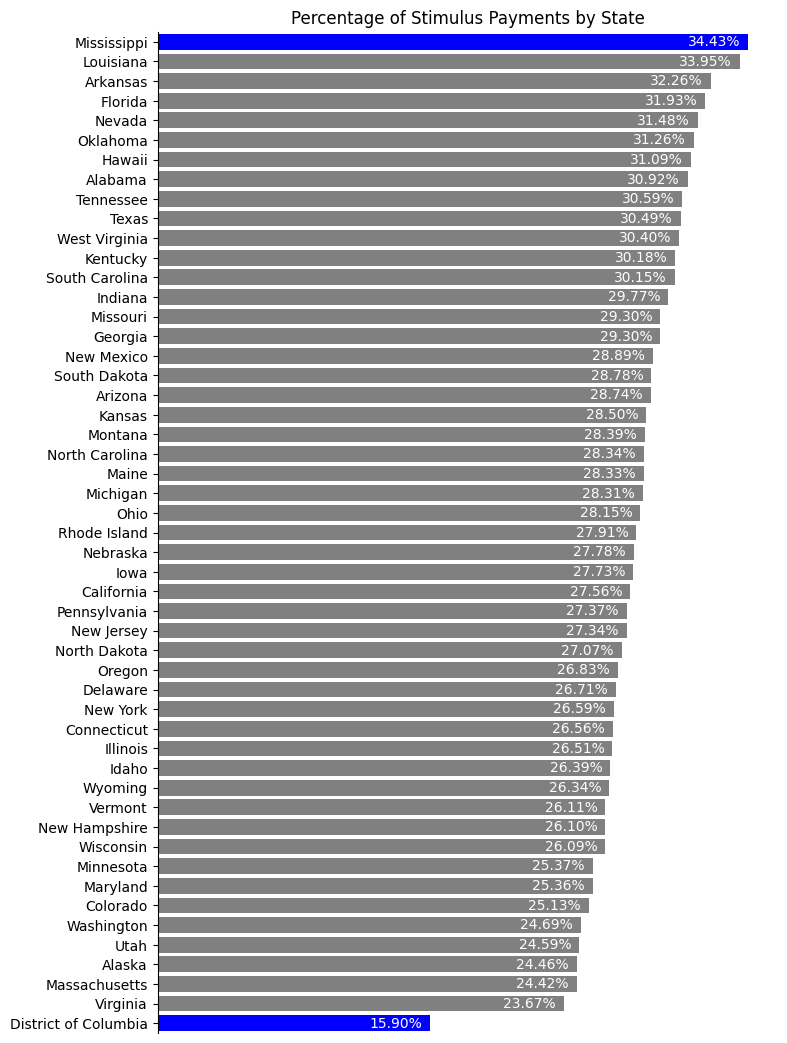

In [ ]:
# Sort the data by Stimulus Payment Rate
stimulus_rates = stimulus_rates.sort_values(by='Stimulus_Payment_Rate')

# Assign colors: grey for all, blue for highest and lowest
colors = ['grey'] * len(stimulus_rates)
colors[0] = 'blue'  # Lowest
colors[-1] = 'blue'  # Highest

# Create a horizontal histogram (bar chart)
plt.figure(figsize=(8, 13))
bars = plt.barh(stimulus_rates['State'], stimulus_rates['Stimulus_Payment_Rate'], color=colors)

# Add percentage labels to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.02 if width > 0.15 else width + 0.02
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2%}', va='center', ha='center', color='white' if width > 0.15 else 'black')

# Remove x-axis numbers
plt.xticks([])

#plt.xlabel('Percentage of Stimulus Payments')
#plt.ylabel('State')
plt.title('Percentage of Stimulus Payments by State')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust y-axis limits to remove empty space
plt.ylim(-0.5, len(stimulus_rates)-0.5)

# Show the plot
plt.show()

As shown, the **highest** percentage of Economic Impact (**stimulus**) payments among survey respondents is **Mississippi**

## 2.2

###1.
**How does household size affect the receipt and use of the Economic Impact Payment (EIP)?**


In [ ]:
# Clean the data: drop NaN values and filter out missing values marked as -99
df2_cleaned = df2.dropna(subset=['eip'])
df2_cleaned = df2_cleaned[df2_cleaned['eip'] != -99]

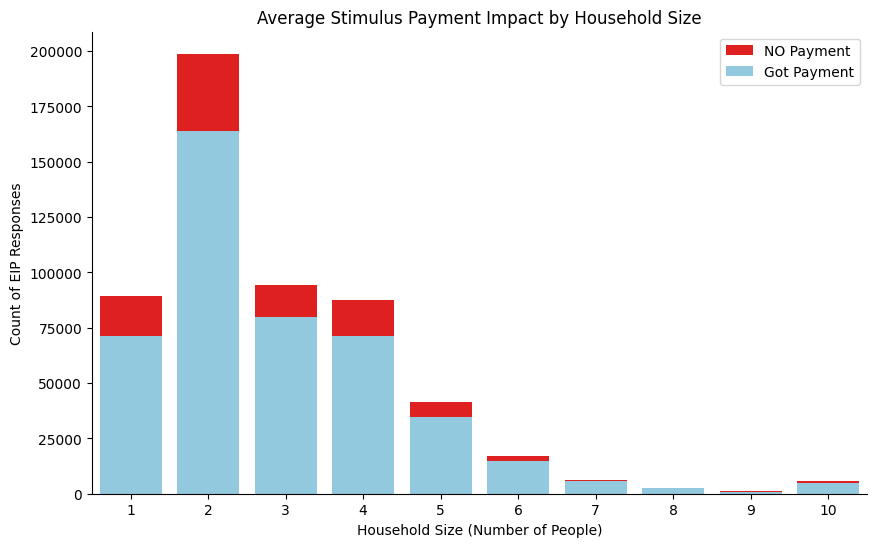

In [ ]:
# Assuming df2_cleaned is already defined and cleaned
# Calculate impact for eip value 4
impact_eip_4 = df2_cleaned[df2_cleaned['eip'] == 4].groupby('thhld_numper')['eip'].count().reset_index(name='count_eip_4')

# Calculate the sum for eip values 1, 2, and 3
conditions = (df2_cleaned['eip'] == 1) | (df2_cleaned['eip'] == 2) | (df2_cleaned['eip'] == 3)
impact_eip_123 = df2_cleaned[conditions].groupby('thhld_numper')['eip'].count().reset_index(name='count_eip_123')

# Merge the two dataframes on 'thhld_numper' to align the data for plotting
impact_merged = pd.merge(impact_eip_123, impact_eip_4, on='thhld_numper', how='outer').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot EIP 4 on top of EIP 1+2+3
sns.barplot(x='thhld_numper', y='count_eip_4', data=impact_merged, color='red', label='NO Payment', bottom=impact_merged['count_eip_123'])

# Plot EIP 1+2+3
sns.barplot(x='thhld_numper', y='count_eip_123', data=impact_merged, color='skyblue', label='Got Payment')



plt.title('Average Stimulus Payment Impact by Household Size')
plt.xlabel('Household Size (Number of People)')
plt.ylabel('Count of EIP Responses')
plt.xticks(rotation=0)
plt.legend()

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

- Those with 1 to 4 members, have a higher count of responses both for receiving and not receiving payments. This suggests that smaller households are more prevalent in the dataset or more likely to respond to the survey.
- The highest overall response is observed in households with 3 members, indicating that this household size is either more common or more engaged with the survey process.
- There is a significant drop in the number of responses as household size increases. Households with more than 5 members show markedly fewer responses, which might reflect their relative rarity or lower response rates from these groups.
- Overall, count of people who got payment is less than count of people who did not get payment.

### 2.
**How does household size correlate with the mental health impact of COVID-19 lockdown measures?**

In [ ]:
# Get unique values from the column
unique_values = df2['thhld_numper'].unique()

# Sort the unique values
sorted_unique_values = sorted(unique_values)

# Display the sorted unique values
print(sorted_unique_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Get unique values from the column
unique_values = df2['down'].unique()

# Sort the unique values
sorted_unique_values = sorted(unique_values)

# Display the sorted unique values
print(sorted_unique_values)

[-99, -88, 1, 2, 3, 4]


In [ ]:
mental_health = ['down', 'worry', 'anxious']

In [ ]:
def answer(df2, mh):
    feeling = ''
    if mh == 'down':
        feeling = 'Depression'
    if mh == 'worry':
        feeling = 'Worry'
    if mh == 'anxious':
        feeling = 'Anxiety'
    # Clean the data
    df2_cleaned = df2[(df2[mh] != -88) & (df2[mh] != -99)]

    # Calculate mean mental health impact for each household size
    mean_mental_health_impact = df2_cleaned.groupby('thhld_numper')[mh].mean().reset_index()

    # Sort the DataFrame by the average mental health impact
    mean_mental_health_impact_sorted = mean_mental_health_impact.sort_values(by=mh, ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='thhld_numper', y=mh, data=mean_mental_health_impact_sorted, color='skyblue', order=mean_mental_health_impact_sorted['thhld_numper'])
    plt.title(f'Average {feeling} Impact by Household Size')
    plt.xlabel('Household Size (Number of People)')
    plt.ylabel(f'Average {feeling} Impact')
    plt.xticks(rotation=0)

    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

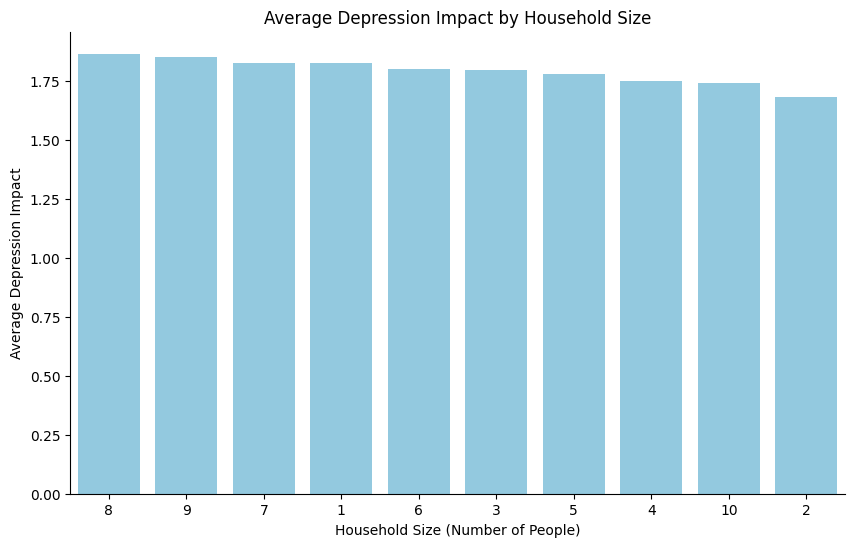

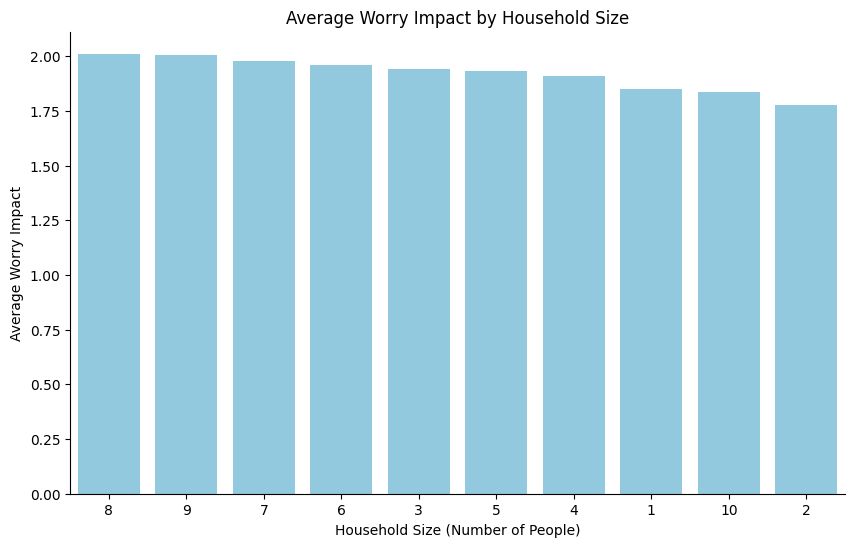

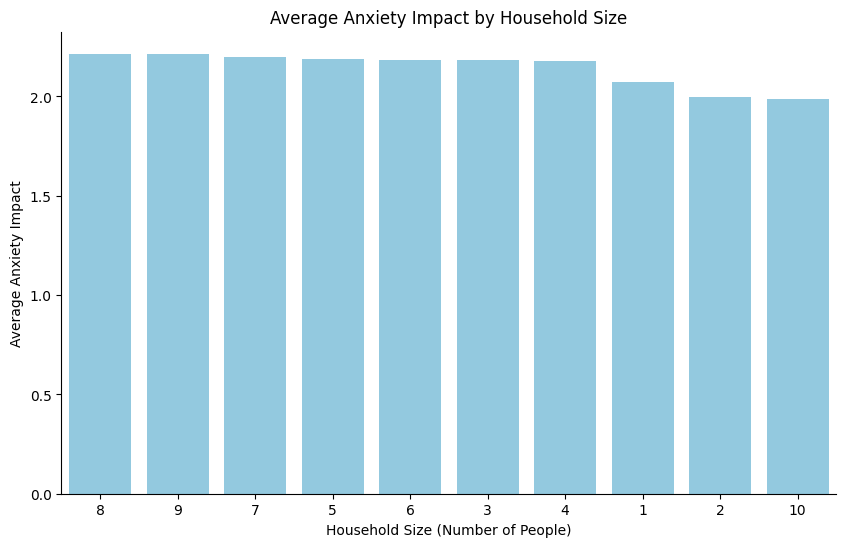

In [ ]:
for mh in mental_health:
  answer(df2, mh)

-  The **depression, worry and anxiety** impact is relatively **similar** across different household sizes, with a slight decrease in smaller households.

### 3.
**Is there a correlation between ICU admissions and the presence of underlying conditions in COVID-19 patients?**

In [ ]:
# Get unique values from the column
unique_values = df1['icu_yn'].unique()

# Sort the unique values
sorted_unique_values = sorted(unique_values)

# Display the sorted unique values
print(sorted_unique_values)

['Missing', 'No', 'Unknown', 'Yes']


In [ ]:
# Get unique values from the column
unique_values = df1['underlying_conditions_yn'].unique()

# Sort the unique values
#sorted_unique_values = sorted(unique_values)

# Display the sorted unique values
print(sorted_unique_values)

['Missing', 'No', 'Unknown', 'Yes']


In [ ]:
data_cleaned = df1[(df1['icu_yn'] != 'Missing') & (df1['icu_yn'] != 'Unknown')]

In [ ]:
data_cleaned = data_cleaned[(data_cleaned['underlying_conditions_yn'] != 'Missing') & (data_cleaned['underlying_conditions_yn'] != 'Unknown')]

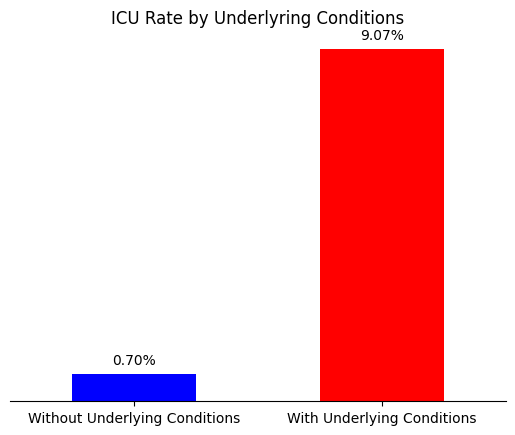

In [ ]:
# Ensure the 'icu_yn' and 'underlying_conditions_yn' columns are correctly formatted as categorical
data_cleaned['icu_yn'] = data_cleaned['icu_yn'].astype('category')
data_cleaned['underlying_conditions_yn'] = data_cleaned['underlying_conditions_yn'].astype('category')

# Calculate the ICU admission rates
icu_rates = data_cleaned.groupby('underlying_conditions_yn')['icu_yn'].value_counts(normalize=True).unstack().fillna(0)
icu_admission_rates = icu_rates['Yes']

# Plotting
ax = icu_admission_rates.plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['Without Underlying Conditions', 'With Underlying Conditions'], rotation=0)
plt.xlabel('')
plt.title("ICU Rate by Underlyring Conditions")
# Hide specific spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Remove y-axis numbers
ax.set_yticks([])

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()

People with underlying conditions are the most people need ICU.

### 4.
**Is there a correlation between age and the time from earliest identification to symptom onset?**

In [ ]:
df1 = df1[df1['case_onset_interval'] >= 0]

In [ ]:
df1['case_onset_interval'] = df1['case_onset_interval'].fillna(value=0)

In [ ]:
df1['case_onset_interval'].unique()

array([  0.,  27.,   1.,   7.,  80.,  20.,  38.,  29.,   3.,  50.,   4.,
         5.,  16.,  53.,  41.,   2.,  13.,  39.,  34.,  25.,  32.,  15.,
        43.,   8.,  49.,  48.,  26.,  51.,  19.,  57.,   6.,  35.,  21.,
        75.,  90.,  56.,  77.,  46.,   9.,  12.,  10.,  47.,  31.,  52.,
        60.,  70.,  45.,  17.,  37.,  22.,  36.,  67.,  59.,  42.,  83.,
        84.,  18.,  30.,  68.,  40., 103.,  44.,  28.,  24.,  64.,  33.,
        11.,  23.,  71.,  88.,  93.,  76.,  14.,  58.,  54.,  69.,  62.,
        61.,  63.,  74.,  79.,  72.,  85.,  65., 100.,  87., 101.,  78.,
        89.,  73.,  82., 102.,  66.,  91.,  55.,  86.,  81., 106., 139.,
       115., 104.,  92.,  94.,  98., 108.,  96., 156., 110., 119.,  97.,
       147., 114., 107.,  99., 112., 129., 122., 109., 105., 126.])

In [ ]:
df1 = df1.dropna(subset=['age_group'])

In [ ]:
df1['age_group'].unique()

array(['65+ years', '0 - 17 years', '50 to 64 years', '18 to 49 years',
       'Missing'], dtype=object)

In [ ]:
grouped_data = df1.groupby('age_group')['case_onset_interval'].mean()

In [ ]:
# Remove the 'Missing' category from the results
grouped_data = grouped_data[grouped_data.index != 'Missing']

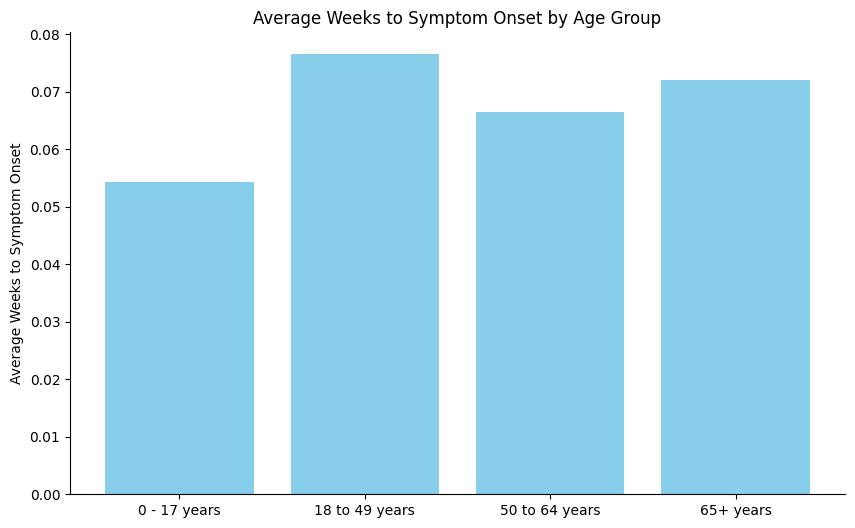

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data.values, color='skyblue')  # Using bar plot to show average values

plt.title('Average Weeks to Symptom Onset by Age Group')
#plt.xlabel('Age Group')
plt.ylabel('Average Weeks to Symptom Onset')

# Remove top and right spines
ax = plt.gca()

# Move x-axis ticks to the top
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')  # To move the x-axis label as well

# Remove unwanted spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


- 18 to 49 years old people experience a delayed onset of symptoms compared to others.

- 0-17 years old children experience onset of symptoms fastly compared to others.




### 5.
**How do the number of cases in different states compare over the same months?**

In [ ]:
df1['case_month'].unique()

array(['2020-12', '2022-02', '2022-01', '2020-05', '2022-10', '2021-10',
       '2021-02', '2021-04', '2022-11', '2020-10', '2021-05', '2020-11',
       '2023-08', '2021-07', '2021-01', '2021-12', '2020-09', '2022-12',
       '2022-07', '2022-05', '2020-03', '2020-08', '2023-01', '2021-08',
       '2024-01', '2022-08', '2020-06', '2020-04', '2021-03', '2021-06',
       '2022-06', '2023-03', '2024-02', '2022-03', '2020-07', '2023-05',
       '2021-09', '2022-09', '2023-10', '2023-04', '2023-12', '2022-04',
       '2023-09', '2023-02', '2023-06', '2024-03', '2021-11', '2023-07',
       '2023-11', '2020-02', '2020-01'], dtype=object)

In [ ]:
df1['res_state'].unique()

array(['MN', 'MI', 'CA', 'NV', 'MA', 'AZ', 'TX', 'FL', 'UT', 'NY', 'PA',
       'OH', 'IL', 'WA', 'NC', 'NE', 'NH', 'GA', 'OR', 'LA', 'AR', 'MT',
       'VA', 'VI', 'ND', 'HI', 'AL', 'ME', 'TN', 'KY', 'WI', 'DC', 'KS',
       'WY', 'OK', 'IA', 'RI', 'CO', 'MS', 'ID', 'IN', 'SC', nan, 'PR',
       'SD', 'CT', 'AK', 'DE', 'NJ', 'MD', 'WV', 'GU', 'MO', 'VT', 'NM'],
      dtype=object)

In [ ]:
# Convert 'case_month' to a datetime type if it isn't already
df1['case_month'] = pd.to_datetime(df1['case_month'], format='%Y-%m')

In [ ]:
grouped_data = df1.groupby(['case_month', 'res_state']).size().reset_index(name='case_count')

In [ ]:
pivoted_data = grouped_data.pivot(index='case_month', columns='res_state', values='case_count')

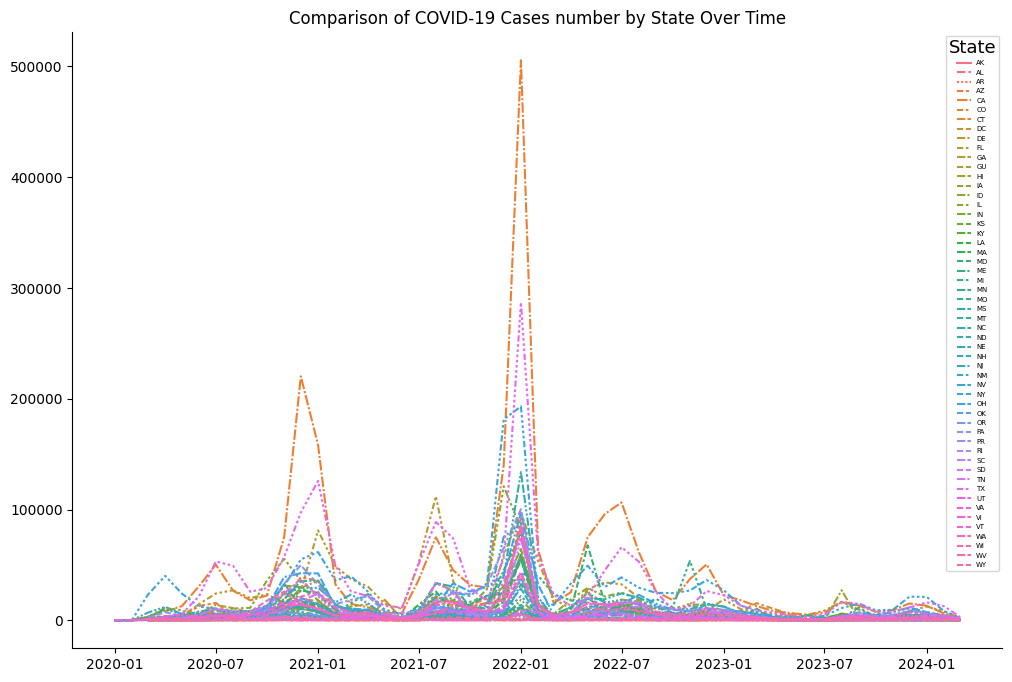

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivoted_data)
plt.title('Comparison of COVID-19 Cases number by State Over Time')
#plt.xlabel('Month')
#plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(title='State', title_fontsize='13', fontsize='5')

ax = plt.gca()
# Remove unwanted spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')

plt.show()

- The graph shows synchronized peaks across most states, indicating nationwide COVID-19 waves, particularly prominent in early 2021 and late 2021.
- By mid-2022, there's a visible decline in cases across all states, which may reflect the effectiveness of interventions like vaccinations.
- There's significant variation in case numbers between states, suggesting differing regional impacts and responses to the pandemic.
- Most of time, California had the most cases numbers.This is becasue of bias of California biggest number of poeple. Normalization is needed.


# 3. Hypothesis Testing

## 3.1 First Claim

### **Claim: “There is a strong association between probability of death due to COVID-19 and patient demographics”**


1. **Stating the Test and Justifying the Choice:**

  We used the chi-square test for independence. This test is appropriate because we are examining the relationship between two categorical variables: patient demographics (a combination of age group, sex, and race) and the outcome (death due to COVID-19).

2. **Stating the Hypotheses:**

  Null Hypothesis (H0): There is no association between patient demographics (age group, sex, race) and death due to COVID-19.
  
  Alternative Hypothesis (HA): There is an association between patient demographics (age group, sex, race) and death due to COVID-19.


In [ ]:
# Creating a combination of age_group, sex, and race
df1['combination'] = df1['age_group'] + ', ' + df1['sex'] + ', ' + df1['race']

# Creating a contingency table for the combination of age_group, sex, and race against death_yn
observed_freq = pd.crosstab(df1['combination'], df1['death_yn'], margins=False)

# Adding the total column
observed_freq['Total'] = observed_freq.sum(axis=1)

# Adding the total row
observed_freq.loc['Total'] = observed_freq.sum()

# Setting display options to print the entire table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("\nobserved Frequencies:")
display(observed_freq)


observed Frequencies:


death_yn,Missing,No,Unknown,Yes,Total
combination,,,,,
"0 - 17 years, Female, American Indian/Alaska Native",6134,1855,717,0,8706
"0 - 17 years, Female, Asian",31348,9396,2416,0,43160
"0 - 17 years, Female, Black",82361,55568,18021,0,155950
"0 - 17 years, Female, Missing",100619,18536,1116,0,120271
"0 - 17 years, Female, Multiple/Other",16843,5543,2246,0,24632
"0 - 17 years, Female, Native Hawaiian/Other Pacific Islander",1262,48,24,0,1334
"0 - 17 years, Female, Unknown",119005,42913,29244,0,191162
"0 - 17 years, Female, White",307197,251254,102341,0,660792
"0 - 17 years, Male, American Indian/Alaska Native",9031,1996,950,0,11977


In [ ]:
print("\nObserved Frequencies with Totals:")
print(observed_freq.to_string())


Observed Frequencies with Totals:
death_yn                                                         Missing       No  Unknown    Yes     Total
combination                                                                                                
0 - 17 years, Female, American Indian/Alaska Native                 6134     1855      717      0      8706
0 - 17 years, Female, Asian                                        31348     9396     2416      0     43160
0 - 17 years, Female, Black                                        82361    55568    18021      0    155950
0 - 17 years, Female, Missing                                     100619    18536     1116      0    120271
0 - 17 years, Female, Multiple/Other                               16843     5543     2246      0     24632
0 - 17 years, Female, Native Hawaiian/Other Pacific Islander        1262       48       24      0      1334
0 - 17 years, Female, Unknown                                     119005    42913    29244      0    

In [ ]:
# Performing the chi-square test
chi2, p, dof, expected_freq = chi2_contingency(observed_freq)

# Creating DataFrames for the observed and expected frequencies
observed_freq_df = pd.DataFrame(observed_freq)
expected_freq_df = pd.DataFrame(expected_freq, index=observed_freq.index, columns=observed_freq.columns)

# Adding the total column to expected frequencies
expected_freq_df['Total'] = expected_freq_df.sum(axis=1)

# Adding the total row to expected frequencies
expected_freq_df.loc['Total'] = expected_freq_df.sum()

print("\nExpected Frequencies with Totals:")
display(expected_freq_df)


Expected Frequencies with Totals:


death_yn,Missing,No,Unknown,Yes,Total
combination,,,,,
"0 - 17 years, Female, American Indian/Alaska Native",4.706120e+03,2.708715e+03,1.246272e+03,44.892511,17412.0
"0 - 17 years, Female, Asian",2.333059e+04,1.342846e+04,6.178395e+03,222.554649,86320.0
"0 - 17 years, Female, Black",8.430042e+04,4.852104e+04,2.232439e+04,804.156570,311900.0
"0 - 17 years, Female, Missing",6.501376e+04,3.742016e+04,1.721691e+04,620.177716,240542.0
"0 - 17 years, Female, Multiple/Other",1.331509e+04,7.663804e+03,3.526094e+03,127.014970,49264.0
"0 - 17 years, Female, Native Hawaiian/Other Pacific Islander",7.211078e+02,4.150501e+02,1.909634e+02,6.878774,2668.0
"0 - 17 years, Female, Unknown",1.033346e+05,5.947662e+04,2.736502e+04,985.727337,382324.0
"0 - 17 years, Female, White",3.571981e+05,2.055935e+05,9.459299e+04,3407.375621,1321584.0
"0 - 17 years, Male, American Indian/Alaska Native",6.474294e+03,3.726428e+03,1.714519e+03,61.759431,23954.0


In [ ]:
# Printing the expected table
print("Contingency Table:")
print(expected_freq_df.to_string())

Contingency Table:
death_yn                                                              Missing            No       Unknown            Yes       Total
combination                                                                                                                         
0 - 17 years, Female, American Indian/Alaska Native              4.706120e+03  2.708715e+03  1.246272e+03      44.892511     17412.0
0 - 17 years, Female, Asian                                      2.333059e+04  1.342846e+04  6.178395e+03     222.554649     86320.0
0 - 17 years, Female, Black                                      8.430042e+04  4.852104e+04  2.232439e+04     804.156570    311900.0
0 - 17 years, Female, Missing                                    6.501376e+04  3.742016e+04  1.721691e+04     620.177716    240542.0
0 - 17 years, Female, Multiple/Other                             1.331509e+04  7.663804e+03  3.526094e+03     127.014970     49264.0
0 - 17 years, Female, Native Hawaiian/Other Pacifi

In [ ]:
# Printing the chi-squared test results
print("\nChi-squared Test Results:")
print(f"Chi-squared value: {chi2:.10f}")
print(f"P-value:", p)
print(f"Degrees of Freedom: {dof}")


# Applying the chi-square test to get the p-value and write conclusion
test_result = stats.chi2_contingency(observed_freq)
chi2_stat = test_result.statistic
p_value = test_result.pvalue

# Conclusion
alpha = 0.05
if p_value < alpha:
    conclusion = "There is a significant association between the combination of age_group, sex, race and death_yn (reject the null hypothesis)."
else:
    conclusion = "There is no significant association between the combination of age_group, sex, race and death_yn (fail to reject the null hypothesis)."

# Printing conclusion
print("\nConclusion:")
print(conclusion)


Chi-squared Test Results:
Chi-squared value: 1565961.2436213298
P-value: 0.0
Degrees of Freedom: 465

Conclusion:
There is a significant association between the combination of age_group, sex, race and death_yn (reject the null hypothesis).



3. **Conducting the Test and Reporting the Result:**

  We have conducted the chi-square test for independence using the provided data. Here are the detailed results:

  * Chi-squared value: 1,565,961.2436213298
  * P-value: 0.0
  * Degrees of Freedom: 465
  
  These results were obtained by analyzing the observed frequencies of the combination of age group, sex, and race against the death outcome due to COVID-19.

4. **Making a Conclusion as to the Validity of the Claim:**

  * Conclusion

    Since the p-value is 0.0, which is significantly less than the significance level of 0.05, we reject the null hypothesis.

  * Interpretation

    The null hypothesis stated that there is no association between patient demographics (age group, sex, race) and death due to COVID-19. By rejecting the null hypothesis, we conclude that:

    There is a significant association between patient demographics (age group, sex, race) and the probability of death due to COVID-19.
  
    This supports the claim that there is a strong association between these variables. Thus, based on the given data and the chi-square test results, we find the claim to be valid.

## 3.2 Second Claim




### **Claim: "There is a significant difference in the mean age between COVID-19 patients who were admitted to the ICU and those who were not admitted to the ICU."**

1. **Stating the Test and Justifying the Choice:**

    We used the independent two-sample t-test. This test is appropriate because we are comparing the means of two independent groups (COVID-19 patients admitted to the ICU and those not admitted to the ICU) to determine if there is a significant difference in their mean ages.

  

2. **Stating the Hypotheses:**

  Null Hypothesis (H0): There is no significant difference in the mean age between COVID-19 patients who were admitted to the ICU and those who were not admitted to the ICU.

  Alternative Hypothesis (HA): There is a significant difference in the mean age between COVID-19 patients who were admitted to the ICU and those who were not admitted to the ICU.

In [ ]:
# Creating a copy of the DataFrame to preserve the original data
df_copy = df1.copy()

# Converting 'age_group' to numeric for the purpose of analysis
# mapping age groups to numeric values if 'age_group' is categorical
age_group_mapping = {
    '0 - 17 years': 1,
    '18 - 49 years': 2,
    '50 - 64 years': 3,
    '65+ years': 4
}
df_copy['age_numeric'] = df_copy['age_group'].map(age_group_mapping)

# Filtering out rows with NaN values in 'age_numeric' or 'icu_yn'
filtered_df = df_copy.dropna(subset=['age_numeric', 'icu_yn'])

In [ ]:
# Ensuring 'icu_yn' has no 'Missing' or 'Unknown' values
filtered_df = filtered_df[~filtered_df['icu_yn'].isin(['Missing', 'Unknown'])]

# Separating the data into two groups: admitted to ICU and not admitted to ICU
icu_admitted = filtered_df[filtered_df['icu_yn'] == 'Yes']['age_numeric']
not_icu_admitted = filtered_df[filtered_df['icu_yn'] == 'No']['age_numeric']

# Calculating descriptive statistics for each group
icu_admitted_stats = icu_admitted.describe()
not_icu_admitted_stats = not_icu_admitted.describe()

# Creating a summary table
summary_table = pd.DataFrame({
    'ICU Admitted': icu_admitted_stats,
    'Not ICU Admitted': not_icu_admitted_stats
})

In [ ]:
# Defining the custom t-test function
def t_test_two_sample_means(group1, group2, alternative='two_sided'):
    '''
    Calculating the test statistic for a t-test on 2 means from independent samples
    group1, group2: all sample data in groups 1 and 2
    Returns: test statistic (t), and p-value
    '''
    # the sample means
    mu1, mu2 = np.mean(group1), np.mean(group2)
    # the sample standard deviations
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    # the sample lengths
    n1, n2 = len(group1), len(group2)
    # the standard error
    se = np.sqrt((std1**2 / n1 + std2**2 / n2))

    # The T-statistic
    t_stat = (mu1 - mu2) / se

    # The degrees of freedom
    df = n1 + n2 - 2

    if alternative == 'two_sided':
        p_val = t.cdf(-abs(t_stat), df)
        return t_stat, 2 * p_val
    elif alternative == 'larger':
        p_val = 1 - t.cdf(t_stat, df)
    elif alternative == 'smaller':
        p_val = t.cdf(t_stat, df)

    return t_stat, p_val

In [ ]:
# Performing the custom t-test
t_stat_custom, p_val_custom = t_test_two_sample_means(icu_admitted, not_icu_admitted, alternative='two_sided')
print("Descriptive Statistics:")
print(summary_table)

Descriptive Statistics:
       ICU Admitted  Not ICU Admitted
count  21711.000000     197912.000000
mean       3.880475          2.594694
std        0.586774          1.497012
min        1.000000          1.000000
25%        4.000000          1.000000
50%        4.000000          4.000000
75%        4.000000          4.000000
max        4.000000          4.000000


In [ ]:
print("\nCustom t-test results:")
print(f"T-statistic: {t_stat_custom:.3f}, P-value: {p_val_custom:.3f}")

# Performing the t-test using scipy
t_stat_scipy, p_val_scipy = ttest_ind(icu_admitted, not_icu_admitted, alternative='two-sided')
print("\nScipy t-test results:")
print(f"T-statistic: {t_stat_scipy:.3f}, P-value: {p_val_scipy:.3f}")

# Conclusion
alpha = 0.05
if p_val_scipy < alpha:
    conclusion = "There is a significant difference in the mean age of patients who were admitted to the ICU and those who were not admitted to the ICU (reject the null hypothesis)."
else:
    conclusion = "There is no significant difference in the mean age of patients who were admitted to the ICU and those who were not admitted to the ICU (fail to reject the null hypothesis)."

print("\nConclusion:")
print(conclusion)


Custom t-test results:
T-statistic: 246.619, P-value: 0.000

Scipy t-test results:
T-statistic: 125.502, P-value: 0.000

Conclusion:
There is a significant difference in the mean age of patients who were admitted to the ICU and those who were not admitted to the ICU (reject the null hypothesis).


3. **Conducting the Test and Reporting the Result:**

  The descriptive statistics table reveal that patients admitted to the ICU tend to be older (mean age group value of 3.880) compared to those not admitted to the ICU (mean age group value of 2.595). The data indicates a clear trend that older patients have a higher likelihood of ICU admission, which aligns with the claim that there is a significant difference in the mean age between these two groups.



4. **Making a Conclusion as to the Validity of the Claim:**


  * Interpretation

  Both the custom and scipy t-tests yielded extremely low p-values (0.000), which are far below the significance level of 0.05. This indicates that the observed difference in mean ages between the two groups is highly significant.

  *  Conclusion
  
  Since the p-value is less than the significance level of 0.05, we reject the null hypothesis.
  
  There is a significant difference in the mean age of COVID-19 patients who were admitted to the ICU and those who were not admitted to the ICU. This supports the claim that the mean age significantly differs between these two groups.

# 4. Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import statsmodels.api as sm

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Pre-Processing

In [ ]:
selected_columns = ['case_month','hosp_yn', 'icu_yn', 'age_group', 'sex','death_yn']

In [ ]:
# Create a new DataFrame with only the specified columns
reg_df = df1[selected_columns]

In [ ]:
reg_df.head()

,case_month,hosp_yn,icu_yn,age_group,sex,death_yn
0,2020-12,Missing,Missing,18 to 49 years,Female,No
1,2022-02,Missing,Missing,18 to 49 years,Female,Unknown
2,2022-01,No,Missing,18 to 49 years,Male,Missing
3,2022-01,Missing,Missing,18 to 49 years,Male,Missing
4,2020-05,No,Missing,65+ years,Female,No


In [ ]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   case_month  object
 1   hosp_yn     object
 2   icu_yn      object
 3   age_group   object
 4   sex         object
 5   death_yn    object
dtypes: object(6)
memory usage: 870.7+ MB


In [ ]:
# Count the number of Null values in each column
missing_values = reg_df.isnull().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
case_month         0
hosp_yn            0
icu_yn             0
age_group     202024
sex           630216
death_yn      616506
dtype: int64


In [ ]:
# Find unique values for each column
unique_values = {col: reg_df[col].unique() for col in reg_df.columns}

# Display the unique values
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'case_month': ['2020-12' '2022-02' '2022-01' '2020-05' '2022-10' '2021-10' '2021-02'
 '2021-04' '2022-11' '2020-10' '2021-05' '2020-11' '2023-08' '2021-07'
 '2021-01' '2021-12' '2020-09' '2022-12' '2022-07' '2022-05' '2020-03'
 '2020-08' '2023-01' '2021-08' '2024-01' '2022-08' '2020-06' '2020-04'
 '2021-03' '2021-06' '2022-06' '2023-03' '2024-02' '2022-03' '2020-07'
 '2023-05' '2021-09' '2022-09' '2023-10' '2023-04' '2023-12' '2022-04'
 '2023-09' '2023-02' '2023-06' '2024-03' '2021-11' '2023-07' '2023-11'
 '2020-01' '2020-02']
Unique values in column 'hosp_yn': ['Missing' 'No' 'Yes' 'Unknown']
Unique values in column 'icu_yn': ['Missing' 'Unknown' 'No' 'Yes']
Unique values in column 'age_group': ['18 to 49 years' '65+ years' '0 - 17 years' '50 to 64 years' nan
 'Missing']
Unique values in column 'sex': ['Female' 'Male' 'Unknown' nan 'Missing' 'Other']
Unique values in column 'death_yn': ['No' 'Unknown' 'Missing' 'Yes' nan]


In [ ]:
# Exclude the "case_month" column
columns_to_exclude = ['case_month']

# Using dictionary comprehension to get value counts
unique_value_counts = {col: reg_df[col].value_counts() for col in reg_df.columns if col not in columns_to_exclude}

# Display the unique value counts
for col, counts in unique_value_counts.items():
    print(f"Value counts in column '{col}':")
    print(counts)

Value counts in column 'hosp_yn':
hosp_yn
Missing    9262259
No         6076680
Unknown    3082221
Yes         599802
Name: count, dtype: int64
Value counts in column 'icu_yn':
icu_yn
Missing    16464928
Unknown     1949254
No           565387
Yes           41393
Name: count, dtype: int64
Value counts in column 'age_group':
age_group
18 to 49 years    9355592
50 to 64 years    3459783
0 - 17 years      3147481
65+ years         2660737
Missing            195345
Name: count, dtype: int64
Value counts in column 'sex':
sex
Female     9846849
Male       8324160
Unknown     143292
Missing      76173
Other          272
Name: count, dtype: int64
Value counts in column 'death_yn':
death_yn
Missing    10137522
No          5664469
Unknown     2518342
Yes           84123
Name: count, dtype: int64


In [ ]:
# count number of "Missing" values
missing_count = reg_df[reg_df == 'Missing'].count()

print("Missing value counts:")
print(missing_count)

Missing value counts:
case_month           0
hosp_yn        9262259
icu_yn        16464928
age_group       195345
sex              76173
death_yn      10137522
dtype: int64


In [ ]:
# Drop rows with NaN and 'Missing' values in 'age_group' column
filtered_age_group = reg_df[(reg_df['age_group'].notna()) & (reg_df['age_group'] != 'Missing')]

In [ ]:
# Define values to keep from sex column
# I excluded the other with the unkown and missing as they represent very small number (272)

values_to_keep = ['Male', 'Female']

# Filter the DataFrame to keep only the desired values in the 'sex' column
filtered_gender = filtered_age_group[filtered_age_group['sex'].isin(values_to_keep)]

In [ ]:
# List of remaining columns to filter
columns_to_filter = ['hosp_yn', 'icu_yn', 'death_yn']

# Filter rows containing 'No' or 'Yes' in the specified columns
filtered_reg_df = filtered_gender[filtered_gender[columns_to_filter].isin(['No', 'Yes']).all(axis=1)]

In [ ]:
# Find unique values for each column
unique_values = {col: filtered_reg_df[col].unique() for col in filtered_reg_df.columns}

# Display the unique values
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'case_month': ['2020-11' '2020-12' '2022-01' '2020-07' '2021-08' '2020-03' '2021-04'
 '2022-04' '2022-12' '2022-02' '2021-01' '2023-03' '2021-12' '2021-09'
 '2020-06' '2020-04' '2022-10' '2022-11' '2021-03' '2023-02' '2021-02'
 '2020-05' '2023-12' '2020-09' '2021-05' '2022-09' '2021-07' '2022-07'
 '2023-09' '2021-11' '2021-10' '2020-10' '2022-05' '2020-08' '2022-03'
 '2022-06' '2023-05' '2024-01' '2021-06' '2023-11' '2023-10' '2023-07'
 '2022-08' '2023-01' '2023-04' '2024-02' '2023-08' '2024-03' '2023-06'
 '2020-02']
Unique values in column 'hosp_yn': ['No' 'Yes']
Unique values in column 'icu_yn': ['No' 'Yes']
Unique values in column 'age_group': ['50 to 64 years' '18 to 49 years' '65+ years' '0 - 17 years']
Unique values in column 'sex': ['Male' 'Female']
Unique values in column 'death_yn': ['No' 'Yes']


In [ ]:
def calculate_proportions(df, group_col, value_col):
    """
    Calculate the proportions of each value in the value_col within each group in the group_col.

    Parameters:
    df: The input dataframe containing the data.
    group_col: The column to group by (e.g., 'case_month').
    value_col: The column whose value proportions are to be calculated (e.g., 'age_group').

    Returns:
    pd.DataFrame: A dataframe with the proportions of each value in the value_col as percentages within each group in the group_col.
                  Each proportion is rounded to 3 decimal places.
    """

    # Group the dataframe by the specified columns and calculate the size of each group
    grouped = df.groupby([group_col, value_col]).size().unstack(fill_value=0)

    # Calculate the total number of cases for each group in 'group_col'
    grouped['total_cases'] = grouped.sum(axis=1)

    # Initialize a dictionary to store the new proportion column names
    proportion_columns = {}

    # Loop through the columns except the 'total_cases' column
    for col in grouped.columns[:-1]:  # Exclude 'total_cases' column
        # Create a new column name for the proportion
        proportion_col = f'{value_col}_{col}%'

        # Calculate the proportion of each value in 'value_col' within each group in 'group_col'
        grouped[proportion_col] = (grouped[col] / grouped['total_cases']) * 100

        # Store the new column name in the dictionary
        proportion_columns[col] = proportion_col

    # Return a dataframe with only the proportion columns, rounded to 3 decimal places
    return grouped[[proportion_columns[col] for col in proportion_columns]].round(3)


In [ ]:
# Calculate proportions for age groups, sex, hospitalization status, and ICU status
age_proportions = calculate_proportions(filtered_reg_df, 'case_month', 'age_group')
sex_proportions = calculate_proportions(filtered_reg_df, 'case_month', 'sex')
hosp_proportions = calculate_proportions(filtered_reg_df, 'case_month', 'hosp_yn')
icu_proportions = calculate_proportions(filtered_reg_df, 'case_month', 'icu_yn')
death_proportions= calculate_proportions(filtered_reg_df, 'case_month', 'death_yn')

In [ ]:
# joining the different proportions into 1 dataframe
proportions_df = age_proportions.join(sex_proportions).join(hosp_proportions).join(icu_proportions).join(death_proportions)

In [ ]:
proportions_df.head()

,age_group_0 - 17 years%,age_group_18 to 49 years%,age_group_50 to 64 years%,age_group_65+ years%,sex_Female%,sex_Male%,hosp_yn_No%,hosp_yn_Yes%,icu_yn_No%,icu_yn_Yes%,death_yn_No%,death_yn_Yes%
case_month,,,,,,,,,,,,
2020-02,0.000,16.667,0.000,83.333,66.667,33.333,0.000,100.000,16.667,83.333,16.667,83.333
2020-03,0.685,47.744,30.278,21.293,49.658,50.342,61.422,38.578,82.554,17.446,86.060,13.940
2020-04,2.497,48.400,24.724,24.379,51.923,48.077,72.367,27.633,88.563,11.437,87.315,12.685
2020-05,5.191,55.505,21.264,18.041,53.237,46.763,79.464,20.536,92.499,7.501,93.796,6.204
2020-06,7.512,65.526,16.735,10.228,54.171,45.829,88.276,11.724,95.768,4.232,97.551,2.449


# Multiple Regression Model:

## Trial 1 ( All the preprocessed explanatory variables are included) :

## With Intercept:

In [ ]:
proportions_df['intercept']=1

In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X = proportions_df[['intercept','age_group_0 - 17 years%', 'age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
        'sex_Male%', 'hosp_yn_Yes%', 'icu_yn_Yes%']]
y = proportions_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     175.8
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.09e-23
Time:                        13:37:07   Log-Likelihood:                -85.678
No. Observations:                  40   AIC:                             187.4
Df Residuals:                      32   BIC:                             200.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                     16.030245
age_group_0 - 17 years%     -801.621312
age_group_18 to 49 years%   -801.703422
age_group_50 to 64 years%   -801.396211
age_group_65+ years%        -801.747448
sex_Female%                  801.575388
sex_Male%                    801.449149
hosp_yn_Yes%                  -0.476649
icu_yn_Yes%                    1.614155
dtype: float64

P-values:
intercept                    4.188655e-01
age_group_0 - 17 years%      4.189061e-01
age_group_18 to 49 years%    4.188411e-01
age_group_50 to 64 years%    4.190333e-01
age_group_65+ years%         4.188408e-01
sex_Female%                  4.188559e-01
sex_Male%                    4.188751e-01
hosp_yn_Yes%                 1.490516e-04
icu_yn_Yes%                  1.463864e-15
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'age_group_0 - 17 years%', 'age_group_18 to 49 years%',
       'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
       'sex_Male%'],
      dtype='object')


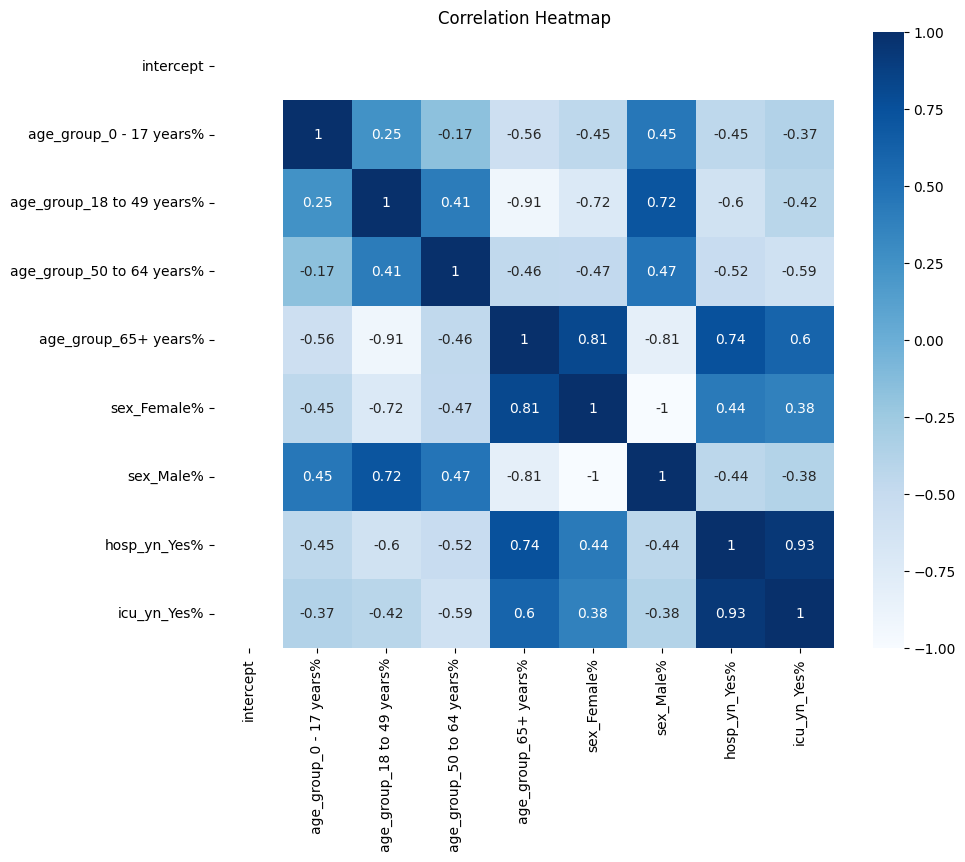

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

It is observed that there is a high dependency between the input features especially the hosp_yn and the icu_yn which is expected because most of the patients that were hospitalized goes to an intensive care unit wheى the medical condition of a patient worsens.

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0     age_group_0 - 17 years%    age_group_0 - 17 years%  1.000000
1   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
2   age_group_18 to 49 years%       age_group_65+ years% -0.914086
3   age_group_18 to 49 years%                sex_Female% -0.717634
4   age_group_18 to 49 years%                  sex_Male%  0.717634
5   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
6        age_group_65+ years%  age_group_18 to 49 years% -0.914086
7        age_group_65+ years%       age_group_65+ years%  1.000000
8        age_group_65+ years%                sex_Female%  0.813979
9        age_group_65+ years%                  sex_Male% -0.813979
10       age_group_65+ years%               hosp_yn_Yes%  0.744079
11                sex_Female%  age_group_18 to 49 years% -0.717634
12                sex_Female%       age_group_65+ years%  0.813979
13                sex_Female%                sex_Female%  1.00

## Use Higher Order Terms:

In [ ]:
# let's try out introducing higher order terms which are "sex_Male", "hosp_yn_Yes%","age_group_18 to 49 years%"

proportions_df['sex_Female_squared']=proportions_df['sex_Female%']**2
proportions_df['hosp_yn_Yes%_Squared']=proportions_df['hosp_yn_Yes%']**2
proportions_df['age_group_18 to 49 years%_cubed']=proportions_df['age_group_18 to 49 years%']**3


In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_1 = proportions_df[['intercept','sex_Female_squared','age_group_0 - 17 years%', 'hosp_yn_Yes%_Squared','age_group_50 to 64 years%','age_group_18 to 49 years%_cubed'
,'age_group_65+ years%','sex_Male%', 'icu_yn_Yes%']]
y_1 = proportions_df['death_yn_Yes%']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     164.3
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.47e-23
Time:                        13:37:08   Log-Likelihood:                -83.771
No. Observations:                  40   AIC:                             185.5
Df Residuals:                      31   BIC:                             200.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                          239.136955
sex_Female_squared                  -0.018368
age_group_0 - 17 years%             -1.048876
hosp_yn_Yes%_Squared                -0.005956
age_group_50 to 64 years%           -1.320937
age_group_18 to 49 years%_cubed     -0.000134
age_group_65+ years%                -1.055283
sex_Male%                           -2.468488
icu_yn_Yes%                          1.855016
dtype: float64

P-values:
intercept                          0.449478
sex_Female_squared                 0.624619
age_group_0 - 17 years%            0.001207
hosp_yn_Yes%_Squared               0.028725
age_group_50 to 64 years%          0.001453
age_group_18 to 49 years%_cubed    0.000379
age_group_65+ years%               0.000052
sex_Male%                          0.575431
icu_yn_Yes%                        0.000002
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['age_group_0 - 17 years%', 'hosp_yn_Yes%_Squared',
       'age_group_50 to 64 years%', 'age_group_18 to 49 years%_cubed',
       'age_group_65+ years%', 'icu_yn_Yes%'],
      dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'sex_Female_squared', 'sex_Male%'], dtype='object')


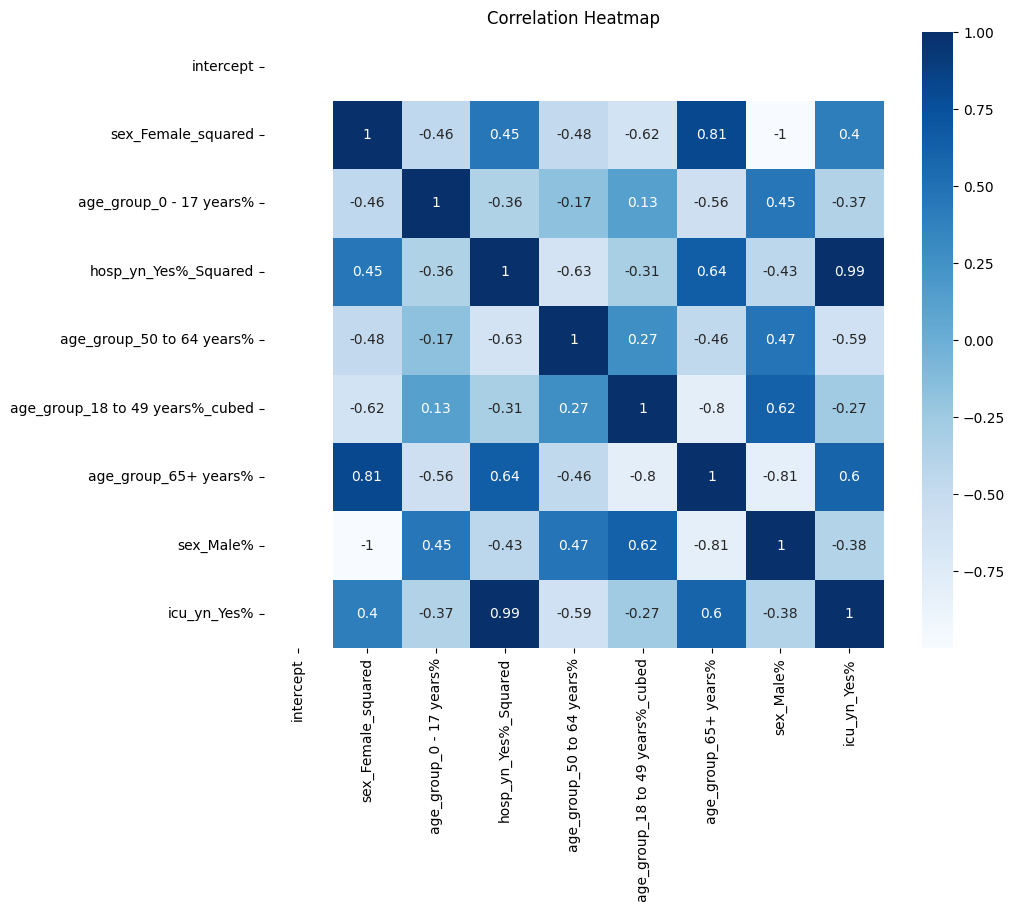

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                            level_0                          level_1         0
0                sex_Female_squared               sex_Female_squared  1.000000
1                sex_Female_squared             age_group_65+ years%  0.814592
2                sex_Female_squared                        sex_Male% -0.999321
3           age_group_0 - 17 years%          age_group_0 - 17 years%  1.000000
4              hosp_yn_Yes%_Squared             hosp_yn_Yes%_Squared  1.000000
5              hosp_yn_Yes%_Squared                      icu_yn_Yes%  0.992772
6         age_group_50 to 64 years%        age_group_50 to 64 years%  1.000000
7   age_group_18 to 49 years%_cubed  age_group_18 to 49 years%_cubed  1.000000
8   age_group_18 to 49 years%_cubed             age_group_65+ years% -0.799745
9              age_group_65+ years%               sex_Female_squared  0.814592
10             age_group_65+ years%  age_group_18 to 49 years%_cubed -0.799745
11             age_group_65+ years%             age_

# Without Intercept:

In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_2 = proportions_df[['age_group_0 - 17 years%', 'age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
        'sex_Male%', 'hosp_yn_Yes%', 'icu_yn_Yes%']]
y_2= proportions_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     175.8
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.09e-23
Time:                        13:37:09   Log-Likelihood:                -85.678
No. Observations:                  40   AIC:                             187.4
Df Residuals:                      32   BIC:                             200.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age_group_0 - 17 years

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
age_group_0 - 17 years%     -801.621312
age_group_18 to 49 years%   -801.703422
age_group_50 to 64 years%   -801.396211
age_group_65+ years%        -801.747448
sex_Female%                  801.735691
sex_Male%                    801.609452
hosp_yn_Yes%                  -0.476649
icu_yn_Yes%                    1.614155
dtype: float64

P-values:
age_group_0 - 17 years%      4.189061e-01
age_group_18 to 49 years%    4.188411e-01
age_group_50 to 64 years%    4.190333e-01
age_group_65+ years%         4.188408e-01
sex_Female%                  4.188559e-01
sex_Male%                    4.188751e-01
hosp_yn_Yes%                 1.490516e-04
icu_yn_Yes%                  1.463864e-15
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['age_group_0 - 17 years%', 'age_group_18 to 49 years%',
       'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
       'sex_Male%'],
      dtype='object')


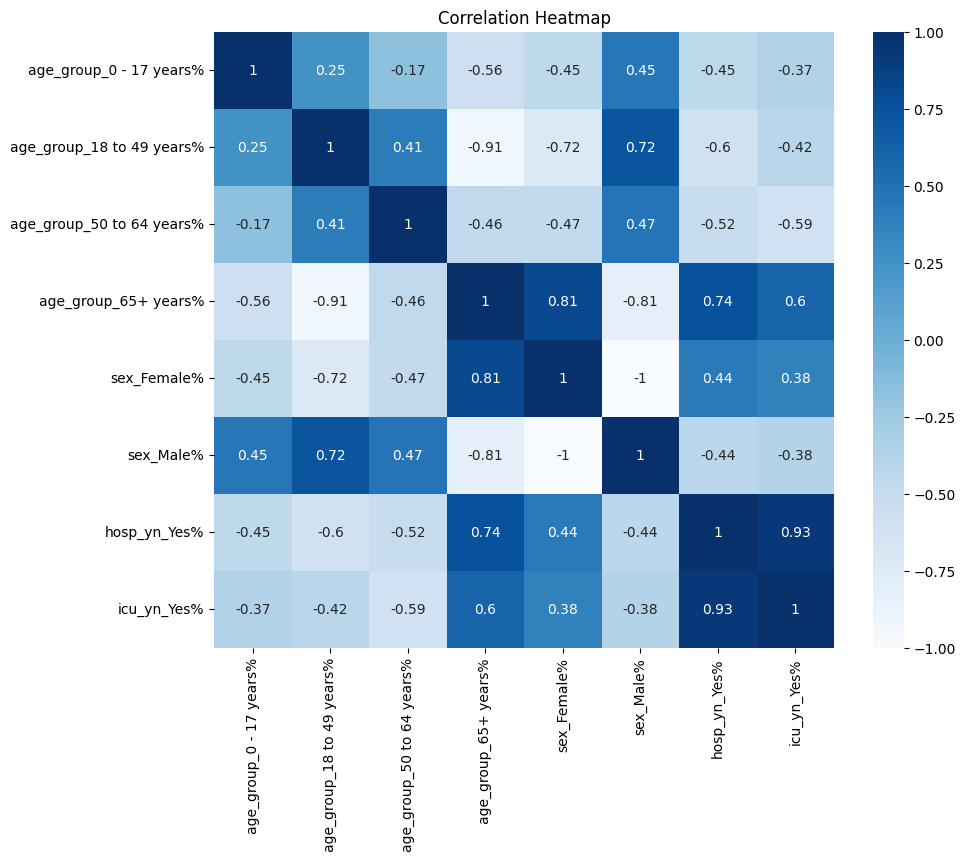

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0     age_group_0 - 17 years%    age_group_0 - 17 years%  1.000000
1   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
2   age_group_18 to 49 years%       age_group_65+ years% -0.914086
3   age_group_18 to 49 years%                sex_Female% -0.717634
4   age_group_18 to 49 years%                  sex_Male%  0.717634
5   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
6        age_group_65+ years%  age_group_18 to 49 years% -0.914086
7        age_group_65+ years%       age_group_65+ years%  1.000000
8        age_group_65+ years%                sex_Female%  0.813979
9        age_group_65+ years%                  sex_Male% -0.813979
10       age_group_65+ years%               hosp_yn_Yes%  0.744079
11                sex_Female%  age_group_18 to 49 years% -0.717634
12                sex_Female%       age_group_65+ years%  0.813979
13                sex_Female%                sex_Female%  1.00

## Removing the Outliers:
By looking at the proportions distribution over the different months, it seems that the 1st month represents the outlier among all months. So, let's remove it how that will affect the model.

In [ ]:
# Drop the first row that represents the 1st month (2020 - 02)

remove_outliers_df = proportions_df.iloc[1:]

In [ ]:
remove_outliers_df.head()

,age_group_0 - 17 years%,age_group_18 to 49 years%,age_group_50 to 64 years%,age_group_65+ years%,sex_Female%,sex_Male%,hosp_yn_No%,hosp_yn_Yes%,icu_yn_No%,icu_yn_Yes%,death_yn_No%,death_yn_Yes%,intercept,sex_Female_squared,hosp_yn_Yes%_Squared,age_group_18 to 49 years%_cubed
case_month,,,,,,,,,,,,,,,,
2020-03,0.685,47.744,30.278,21.293,49.658,50.342,61.422,38.578,82.554,17.446,86.060,13.940,1,2465.916964,1488.262084,108831.948407
2020-04,2.497,48.400,24.724,24.379,51.923,48.077,72.367,27.633,88.563,11.437,87.315,12.685,1,2695.997929,763.582689,113379.904000
2020-05,5.191,55.505,21.264,18.041,53.237,46.763,79.464,20.536,92.499,7.501,93.796,6.204,1,2834.178169,421.727296,171000.082913
2020-06,7.512,65.526,16.735,10.228,54.171,45.829,88.276,11.724,95.768,4.232,97.551,2.449,1,2934.497241,137.452176,281346.147352
2020-07,8.733,59.193,19.327,12.747,53.311,46.689,87.064,12.936,95.066,4.934,96.954,3.046,1,2842.062721,167.340096,207401.099262


In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_outlier = remove_outliers_df[['intercept','age_group_0 - 17 years%', 'age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
        'sex_Male%', 'hosp_yn_Yes%', 'icu_yn_Yes%']]
y_outlier= remove_outliers_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_outlier, y_outlier, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     11.16
Date:                Thu, 23 May 2024   Prob (F-statistic):           5.76e-07
Time:                        14:12:17   Log-Likelihood:                -73.837
No. Observations:                  39   AIC:                             163.7
Df Residuals:                      31   BIC:                             177.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                     -4.017580
age_group_0 - 17 years%      200.931594
age_group_18 to 49 years%    200.863861
age_group_50 to 64 years%    201.307492
age_group_65+ years%         200.940227
sex_Female%                 -201.040916
sex_Male%                   -200.717041
hosp_yn_Yes%                  -0.263415
icu_yn_Yes%                    0.809434
dtype: float64

P-values:
intercept                    0.747850
age_group_0 - 17 years%      0.747838
age_group_18 to 49 years%    0.747914
age_group_50 to 64 years%    0.747386
age_group_65+ years%         0.747832
sex_Female%                  0.747668
sex_Male%                    0.748032
hosp_yn_Yes%                 0.032190
icu_yn_Yes%                  0.004831
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'age_group_0 - 17 years%', 'age_group_18 to 49 years%',
       'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%',
       'sex_Male%'],
      dtype='object')


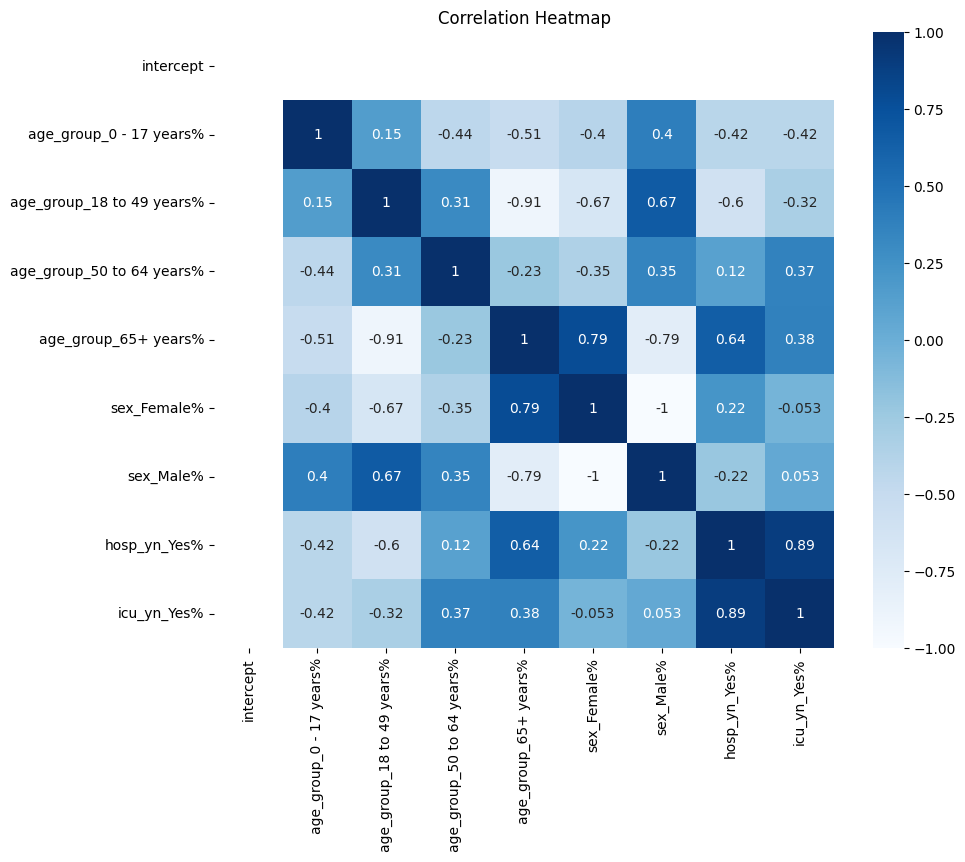

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0     age_group_0 - 17 years%    age_group_0 - 17 years%  1.000000
1   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
2   age_group_18 to 49 years%       age_group_65+ years% -0.910206
3   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
4        age_group_65+ years%  age_group_18 to 49 years% -0.910206
5        age_group_65+ years%       age_group_65+ years%  1.000000
6        age_group_65+ years%                sex_Female%  0.786376
7        age_group_65+ years%                  sex_Male% -0.786376
8                 sex_Female%       age_group_65+ years%  0.786376
9                 sex_Female%                sex_Female%  1.000000
10                sex_Female%                  sex_Male% -1.000000
11                  sex_Male%       age_group_65+ years% -0.786376
12                  sex_Male%                sex_Female% -1.000000
13                  sex_Male%                  sex_Male%  1.00

## **Comments:**
-  In this trial, we compared 4 cases for the input columns to the regression model with intercept, without intercept, with introducing higher order features, and with removing outliers.

- The results were as following:

1. For the **"With Intercept Case"**:

- Mean Absolute Error (MAE): 2.0979
- Mean Squared Error (MSE): 6.0857
- R-squared: 0.975

2. For the **"Higher Order Features"**:

- Mean Absolute Error (MAE): 2.6485
- Mean Squared Error (MSE): 10.9350
- R-squared: 0.977


3. For the **"Without Intercept Case"**:
- Mean Absolute Error (MAE): 2.0979
- Mean Squared Error (MSE): 6.0857
- R-squared: 0.975

4. For the **"Removing the Outliers"**:
- Mean Absolute Error (MAE): 1.3695
- Mean Squared Error (MSE): 3.3171
- R-squared: 0.716

##**Intrepretation:**

**With and Without Intercept:**

The models with and without intercepts exhibit similar performance, as indicated by identical MAE, MSE, and R-squared values. This suggests that the intercept term does not significantly impact the model's predictive capability in this case.

**Higher Order Features:**

Although the R-squared value slightly increases, indicating a better fit to the training data, the increase in both MAE and MSE suggests potential overfitting.

**Removing Outliers:**

After removing outliers, there is a noticeable improvement in model performance. The MAE and MSE decrease significantly, indicating a better fit to the data. However, the R-squared value decreases, suggesting that the model explains less of the variance in the target variable after removing outliers.




# Trial 2 :
( Exclude Males and Age Group [from 0 to 17] variables from the input variables to the model)

## With Intercept:

In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_3 = proportions_df[['intercept', 'age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%', 'hosp_yn_Yes%', 'icu_yn_Yes%']]
y_3 = proportions_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     207.0
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.00e-24
Time:                        13:37:10   Log-Likelihood:                -86.092
No. Observations:                  40   AIC:                             186.2
Df Residuals:                      33   BIC:                             198.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                    5.393590
age_group_18 to 49 years%   -0.113179
age_group_50 to 64 years%    0.221431
age_group_65+ years%        -0.113698
sex_Female%                  0.033417
hosp_yn_Yes%                -0.505864
icu_yn_Yes%                  1.637797
dtype: float64

P-values:
intercept                    6.451224e-01
age_group_18 to 49 years%    2.074983e-01
age_group_50 to 64 years%    8.418789e-02
age_group_65+ years%         2.449119e-01
sex_Female%                  8.720132e-01
hosp_yn_Yes%                 2.899968e-05
icu_yn_Yes%                  1.724083e-16
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'age_group_18 to 49 years%', 'age_group_50 to 64 years%',
       'age_group_65+ years%', 'sex_Female%'],
      dtype='object')


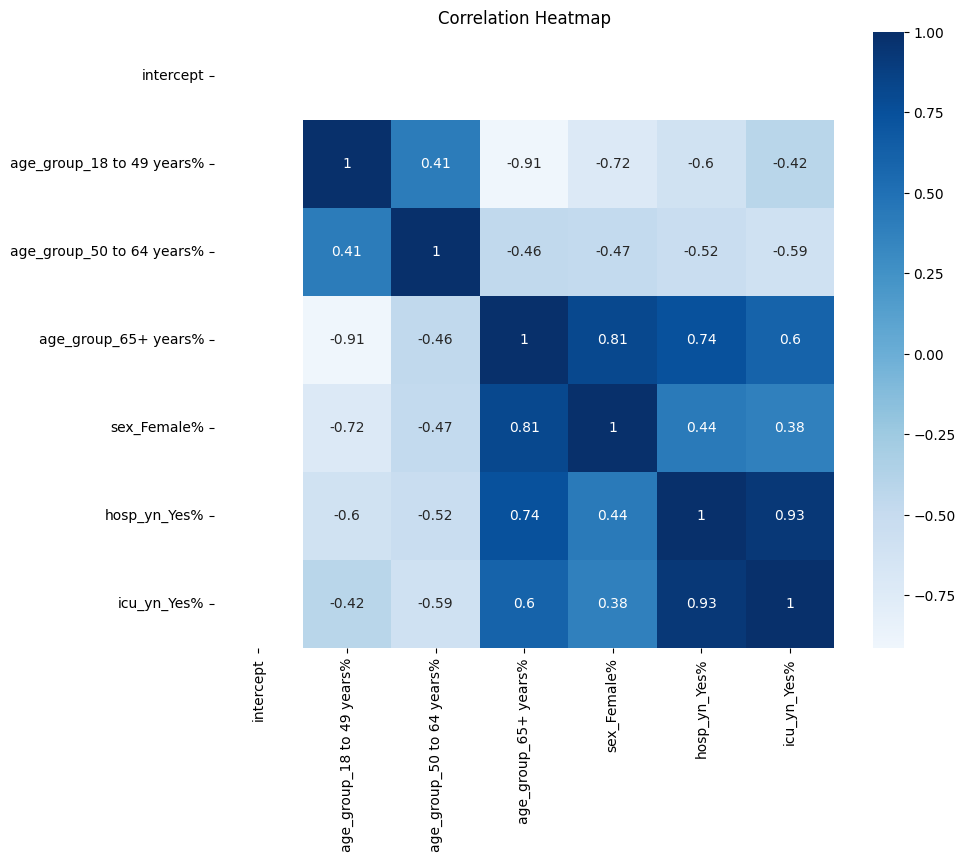

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
1   age_group_18 to 49 years%       age_group_65+ years% -0.914086
2   age_group_18 to 49 years%                sex_Female% -0.717634
3   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
4        age_group_65+ years%  age_group_18 to 49 years% -0.914086
5        age_group_65+ years%       age_group_65+ years%  1.000000
6        age_group_65+ years%                sex_Female%  0.813979
7        age_group_65+ years%               hosp_yn_Yes%  0.744079
8                 sex_Female%  age_group_18 to 49 years% -0.717634
9                 sex_Female%       age_group_65+ years%  0.813979
10                sex_Female%                sex_Female%  1.000000
11               hosp_yn_Yes%       age_group_65+ years%  0.744079
12               hosp_yn_Yes%               hosp_yn_Yes%  1.000000
13               hosp_yn_Yes%                icu_yn_Yes%  0.93

## Use Higher Order Terms:

In [ ]:
# let's try out introducing higher order terms which are "sex_Male", "hosp_yn_Yes%","age_group_18 to 49 years%"

proportions_df['sex_Female_squared']=proportions_df['sex_Female%']**2
proportions_df['hosp_yn_Yes%_Squared']=proportions_df['hosp_yn_Yes%']**2
proportions_df['age_group_18 to 49 years%_cubed']=proportions_df['age_group_18 to 49 years%']**3


In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_4 = proportions_df[['intercept','sex_Female_squared', 'hosp_yn_Yes%_Squared','age_group_50 to 64 years%','age_group_18 to 49 years%_cubed'
,'age_group_65+ years%', 'icu_yn_Yes%']]
y_4 = proportions_df['death_yn_Yes%']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     163.8
Date:                Thu, 23 May 2024   Prob (F-statistic):           4.21e-23
Time:                        13:37:11   Log-Likelihood:                -90.639
No. Observations:                  40   AIC:                             195.3
Df Residuals:                      33   BIC:                             207.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                         -8.530902
sex_Female_squared                 0.004514
hosp_yn_Yes%_Squared              -0.008400
age_group_50 to 64 years%         -0.074107
age_group_18 to 49 years%_cubed   -0.000019
age_group_65+ years%              -0.300709
icu_yn_Yes%                        2.143970
dtype: float64

P-values:
intercept                          1.424016e-01
sex_Female_squared                 1.101649e-02
hosp_yn_Yes%_Squared               5.670983e-03
age_group_50 to 64 years%          6.188900e-01
age_group_18 to 49 years%_cubed    8.809281e-02
age_group_65+ years%               3.502112e-04
icu_yn_Yes%                        1.720302e-07
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['sex_Female_squared', 'hosp_yn_Yes%_Squared', 'age_group_65+ years%',
       'icu_yn_Yes%'],
      dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'age_group_50 to 64 years%',
       'age_group_18 to 49 years%_cubed'],
      dtype='object')


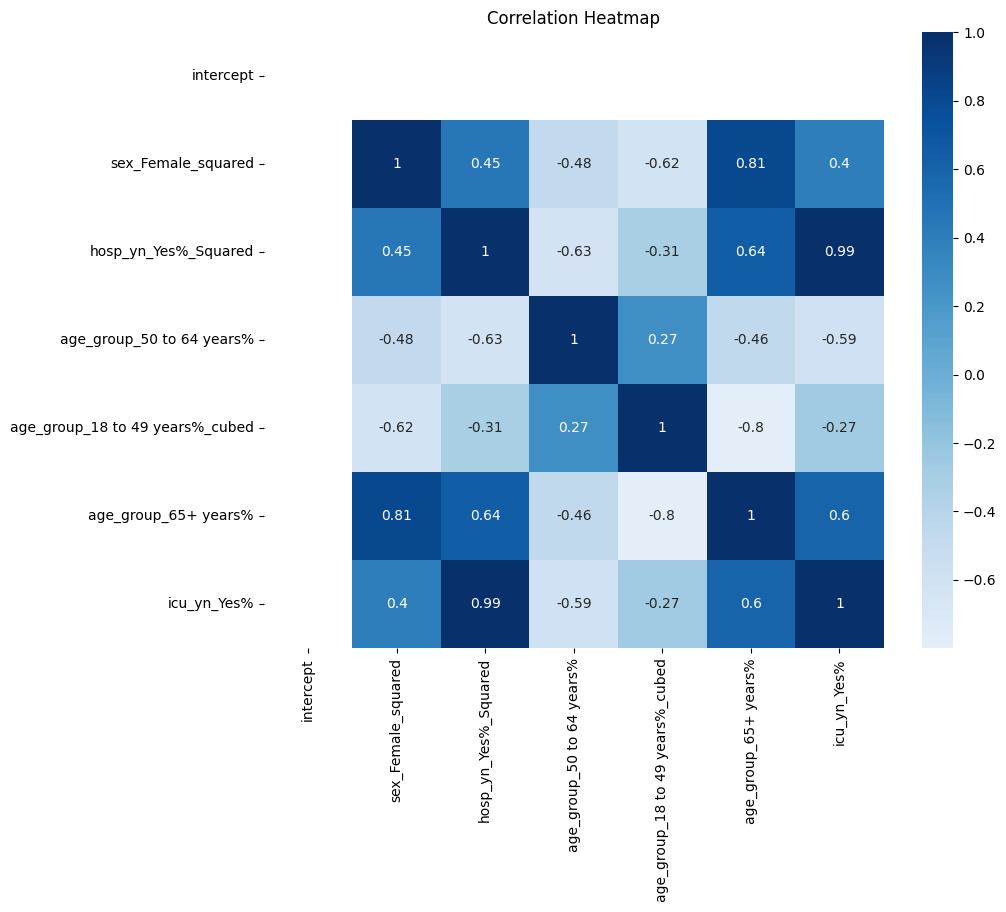

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                            level_0                          level_1         0
0                sex_Female_squared               sex_Female_squared  1.000000
1                sex_Female_squared             age_group_65+ years%  0.814592
2              hosp_yn_Yes%_Squared             hosp_yn_Yes%_Squared  1.000000
3              hosp_yn_Yes%_Squared                      icu_yn_Yes%  0.992772
4         age_group_50 to 64 years%        age_group_50 to 64 years%  1.000000
5   age_group_18 to 49 years%_cubed  age_group_18 to 49 years%_cubed  1.000000
6   age_group_18 to 49 years%_cubed             age_group_65+ years% -0.799745
7              age_group_65+ years%               sex_Female_squared  0.814592
8              age_group_65+ years%  age_group_18 to 49 years%_cubed -0.799745
9              age_group_65+ years%             age_group_65+ years%  1.000000
10                      icu_yn_Yes%             hosp_yn_Yes%_Squared  0.992772
11                      icu_yn_Yes%                 

# Without Intercept:

In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_5 = proportions_df[['age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%','hosp_yn_Yes%', 'icu_yn_Yes%']]
y_5= proportions_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                                 OLS Regression Results                                
Dep. Variable:          death_yn_Yes%   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              241.0
Date:                Thu, 23 May 2024   Prob (F-statistic):                    2.26e-26
Time:                        13:37:11   Log-Likelihood:                         -86.223
No. Observations:                  40   AIC:                                      184.4
Df Residuals:                      34   BIC:                                      194.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
age_group_18 to 49 years%   -0.103688
age_group_50 to 64 years%    0.239071
age_group_65+ years%        -0.130269
sex_Female%                  0.118053
hosp_yn_Yes%                -0.480528
icu_yn_Yes%                  1.619556
dtype: float64

P-values:
age_group_18 to 49 years%    2.289528e-01
age_group_50 to 64 years%    4.892498e-02
age_group_65+ years%         1.486213e-01
sex_Female%                  2.216871e-01
hosp_yn_Yes%                 4.321450e-06
icu_yn_Yes%                  1.077967e-17
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['age_group_50 to 64 years%', 'hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['age_group_18 to 49 years%', 'age_group_65+ years%', 'sex_Female%'], dtype='object')


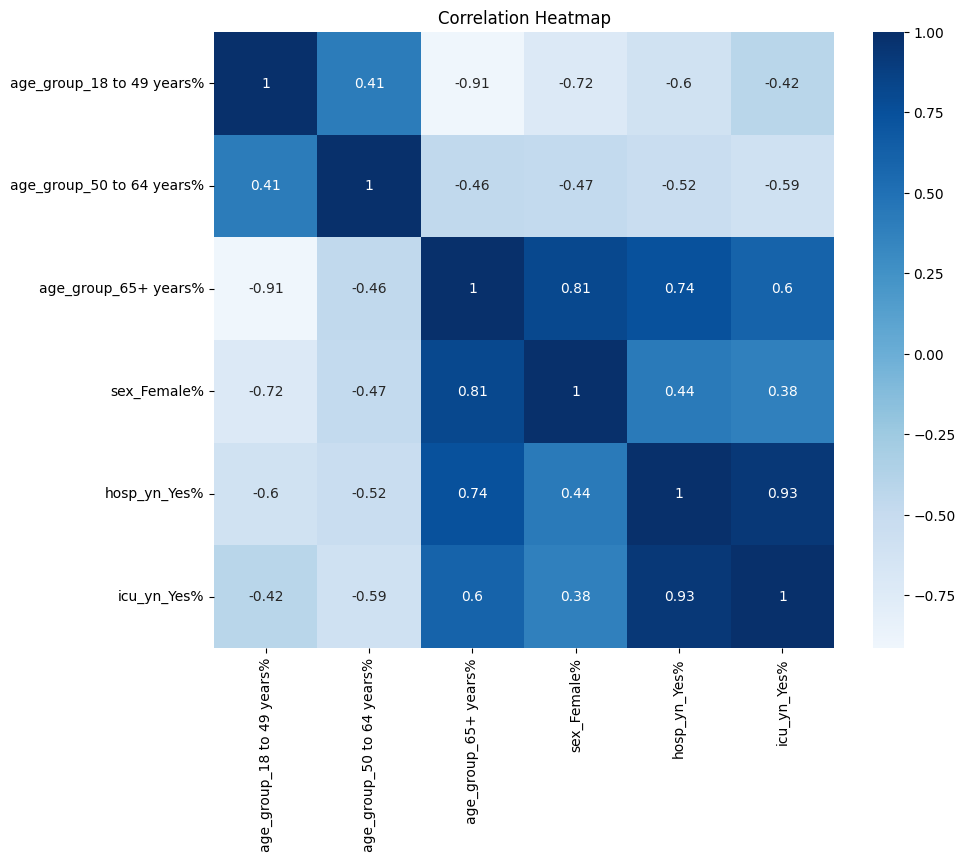

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
1   age_group_18 to 49 years%       age_group_65+ years% -0.914086
2   age_group_18 to 49 years%                sex_Female% -0.717634
3   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
4        age_group_65+ years%  age_group_18 to 49 years% -0.914086
5        age_group_65+ years%       age_group_65+ years%  1.000000
6        age_group_65+ years%                sex_Female%  0.813979
7        age_group_65+ years%               hosp_yn_Yes%  0.744079
8                 sex_Female%  age_group_18 to 49 years% -0.717634
9                 sex_Female%       age_group_65+ years%  0.813979
10                sex_Female%                sex_Female%  1.000000
11               hosp_yn_Yes%       age_group_65+ years%  0.744079
12               hosp_yn_Yes%               hosp_yn_Yes%  1.000000
13               hosp_yn_Yes%                icu_yn_Yes%  0.93

## Removing the Outliers:
By looking at the proportions distribution over the different months, it seems that the 1st month represents the outlier among all months. So, let's remove it how that will affect the model.

In [ ]:
# Drop the first row that represents the 1st month (2020 - 02)

remove_outliers_df = proportions_df.iloc[1:]

In [ ]:
remove_outliers_df.head()

,age_group_0 - 17 years%,age_group_18 to 49 years%,age_group_50 to 64 years%,age_group_65+ years%,sex_Female%,sex_Male%,hosp_yn_No%,hosp_yn_Yes%,icu_yn_No%,icu_yn_Yes%,death_yn_No%,death_yn_Yes%,intercept,sex_Female_squared,hosp_yn_Yes%_Squared,age_group_18 to 49 years%_cubed
case_month,,,,,,,,,,,,,,,,
2020-03,0.685,47.744,30.278,21.293,49.658,50.342,61.422,38.578,82.554,17.446,86.060,13.940,1,2465.916964,1488.262084,108831.948407
2020-04,2.497,48.400,24.724,24.379,51.923,48.077,72.367,27.633,88.563,11.437,87.315,12.685,1,2695.997929,763.582689,113379.904000
2020-05,5.191,55.505,21.264,18.041,53.237,46.763,79.464,20.536,92.499,7.501,93.796,6.204,1,2834.178169,421.727296,171000.082913
2020-06,7.512,65.526,16.735,10.228,54.171,45.829,88.276,11.724,95.768,4.232,97.551,2.449,1,2934.497241,137.452176,281346.147352
2020-07,8.733,59.193,19.327,12.747,53.311,46.689,87.064,12.936,95.066,4.934,96.954,3.046,1,2842.062721,167.340096,207401.099262


In [ ]:
# Define the explanatory variables (X) and the response variable (y)
X_outlier_trial2 = remove_outliers_df[['intercept','age_group_18 to 49 years%', 'age_group_50 to 64 years%', 'age_group_65+ years%', 'sex_Female%','hosp_yn_Yes%', 'icu_yn_Yes%']]
y_outlier_trial2= remove_outliers_df['death_yn_Yes%']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_outlier_trial2, y_outlier_trial2, test_size=0.2, random_state=42)

# Fit the regression model on the training data
lm = sm.OLS(y_train, X_train)
model = lm.fit()

# Display the summary of the regression model
print(model.summary())

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

                            OLS Regression Results                            
Dep. Variable:          death_yn_Yes%   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     13.38
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.55e-07
Time:                        15:12:29   Log-Likelihood:                -73.903
No. Observations:                  39   AIC:                             161.8
Df Residuals:                      32   BIC:                             173.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept             

In [ ]:
# Extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

print("Coefficients:")
print(coefficients)

print("\nP-values:")
print(p_values)

Coefficients:
intercept                    16.017481
age_group_18 to 49 years%    -0.062809
age_group_50 to 64 years%     0.373606
age_group_65+ years%          0.004840
sex_Female%                  -0.300420
hosp_yn_Yes%                 -0.261468
icu_yn_Yes%                   0.814555
dtype: float64

P-values:
intercept                    0.074765
age_group_18 to 49 years%    0.338671
age_group_50 to 64 years%    0.003325
age_group_65+ years%         0.946167
sex_Female%                  0.073510
hosp_yn_Yes%                 0.030686
icu_yn_Yes%                  0.003977
dtype: float64


In [ ]:
# 6. Identify good and bad predictors
good_predictors = model.pvalues[model.pvalues < 0.05].index
bad_predictors = model.pvalues[model.pvalues >= 0.05].index

In [ ]:
print(good_predictors)

Index(['age_group_50 to 64 years%', 'hosp_yn_Yes%', 'icu_yn_Yes%'], dtype='object')


In [ ]:
print(bad_predictors)

Index(['intercept', 'age_group_18 to 49 years%', 'age_group_65+ years%',
       'sex_Female%'],
      dtype='object')


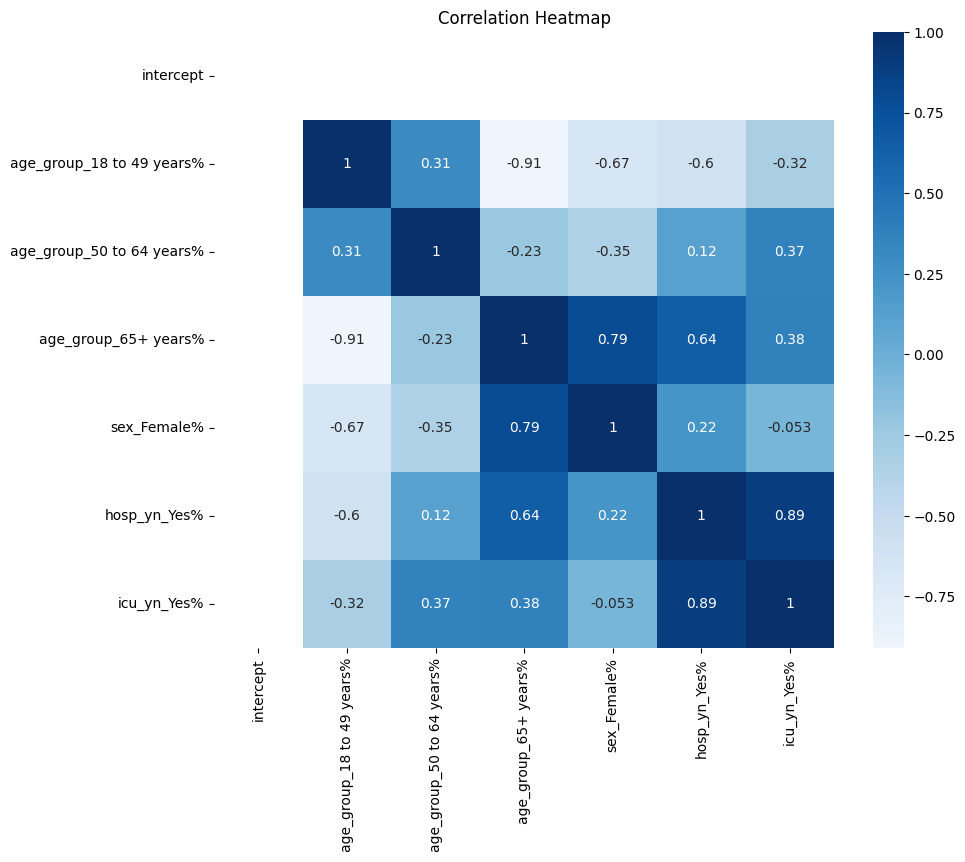

In [ ]:
 # Calculate the correlation matrix
corr_matrix = X_train.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 7. Check for predictor correlation
corr_matrix = X_train.corr()
high_correlation = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
print(high_correlation)


                      level_0                    level_1         0
0   age_group_18 to 49 years%  age_group_18 to 49 years%  1.000000
1   age_group_18 to 49 years%       age_group_65+ years% -0.910206
2   age_group_50 to 64 years%  age_group_50 to 64 years%  1.000000
3        age_group_65+ years%  age_group_18 to 49 years% -0.910206
4        age_group_65+ years%       age_group_65+ years%  1.000000
5        age_group_65+ years%                sex_Female%  0.786376
6                 sex_Female%       age_group_65+ years%  0.786376
7                 sex_Female%                sex_Female%  1.000000
8                hosp_yn_Yes%               hosp_yn_Yes%  1.000000
9                hosp_yn_Yes%                icu_yn_Yes%  0.891396
10                icu_yn_Yes%               hosp_yn_Yes%  0.891396
11                icu_yn_Yes%                icu_yn_Yes%  1.000000


## **Comments:**
- In this trial, we compared the same 4 cases as the previous trial but we excluded males from the analysis as they were dependent on females, thus opting to include only one gender variable to prevent redundancy. Additionally, we removed the age group variable encompassing ages from 0 to 17 due to their interdependence, aiming to mitigate potential overfitting issues.

- The results were as following:

1. For the **"With Intercept Case"**:

- Mean Absolute Error (MAE): 1.9647235264995402
- Mean Squared Error (MSE): 5.940022968418825
- R-squared: 0.974

2. For the **"Higher Order Features"**:

- Mean Absolute Error (MAE): 2.955537230910199
- Mean Squared Error (MSE): 15.794293731150606
- R-squared: 0.968


3. For the **"Without Intercept Case"**:

- Mean Absolute Error (MAE): 2.063377843831198
- Mean Squared Error (MSE): 6.3002329422941035
- R-squared: 0.977

4. For the **"Removing the Outliers"**:

- Mean Absolute Error (MAE): 1.3587706417591412
- Mean Squared Error (MSE): 3.234539217142887
- R-squared: 0.715








##**Intrepretation:**

**With and Without Intercept:**

The models with and without intercepts exhibit similar performance, as indicated by identical MAE, MSE, and R-squared values. This suggests that the intercept term does not significantly impact the model's predictive capability in this case.

**Higher Order Features:**

Although the R-squared value slightly increases, indicating a better fit to the training data, the increase in both MAE and MSE suggests potential overfitting.

**Removing Outliers:**

After removing outliers, there is a noticeable improvement in model performance. The MAE and MSE decrease significantly, indicating a better fit to the data. However, the R-squared value decreases, suggesting that the model explains less of the variance in the target variable after removing outliers.


##**Comparison with the previous trial:**
- The current trial generally outperforms the previous trial in terms of MAE and MSE across most model configurations, indicating improved accuracy and precision in predicting the target variable.

- However, the previous trial achieved higher R-squared values in the "With Intercept Case" and "Higher Order Features" configurations, suggesting better overall fit to the data in those cases.


